# Checking

In [23]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\1.DMSA_Data_Dr._Takahir.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 6  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()
# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

# Extract relevant columns
df = df.iloc[header_row + 1:]  # Exclude the header row itself

# Extract distinct entries of the columns
distinct_percentage = df['percentage of kidney involvement'].dropna().unique()
distinct_location = df['location of parenchymal defects'].dropna().unique()

# Print distinct entries
print("Distinct entries of 'Percentage of kidney involvement':")
print(distinct_percentage)

print("\nDistinct entries of 'Location of parenchymal defects':")
print(distinct_location)


Distinct entries of 'Percentage of kidney involvement':
['<10%' '25-49%' '10-24%' '49-74%']

Distinct entries of 'Location of parenchymal defects':
['Upper Pole' 'Mid Zone' 'upper and lower' 'mid and lower' 'Lower Pole'
 'multiple' 'upper and mid']


In [24]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\1.DMSA_Data_Dr._Takahir.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 6  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()
# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

# Extract relevant columns (assuming patient IDs are in column B and column J)
patient_id_col_B = df.loc[header_row + 1:, 'patient id']  # Extract patient IDs from column B
patient_id_col_J = df.loc[header_row + 1:, 'patient id']  # Extract patient IDs from column J

# Check if patient IDs from both columns are similar in each row
different_patient_ids = df.loc[header_row + 1:][patient_id_col_B != patient_id_col_J]

# Print rows where patient IDs are different
if not different_patient_ids.empty:
    print("Rows with different Patient IDs:")
    print(different_patient_ids)
else:
    print("All rows have similar Patient IDs.")


All rows have similar Patient IDs.


# Intra Observer

# Dr.1: DMSA_Data_Dr. Takahir First stage

In [17]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\1.DMSA_Data_Dr._Takahir.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 6  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Print all column names to check if they match
print("Column names after setting header:")
print(df.columns)

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()
# Keep only the first occurrence of 'patient id' and 'overall impression'
df = df.loc[:, ~df.columns.duplicated()]

# Print all column names after renaming and removing duplicates
print("Column names after renaming and removing duplicates:")
print(df.columns)

# Extract relevant columns
df = df.iloc[header_row + 1:]  # Exclude the header row itself
df = df[['patient id', 'overall impression']]  # Use standardized column names

# Preprocess 'overall impression' column
def preprocess_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation']:
        return 'Scar'
    else:
        print(f"Unexpected value in Overall impression: {impression.strip()}")
        return impression

# Apply preprocessing
df['overall impression'] = df['overall impression'].apply(preprocess_impression)

# Filter rows with unexpected values
unexpected_rows = df[df['overall impression'].apply(lambda x: x not in ['No Scar', 'Scar'])]

# If there are unexpected rows, print them
if not unexpected_rows.empty:
    print("Rows with unexpected 'Overall impression' values:")
    print(unexpected_rows)

# Save the new Excel file
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Dr.1-Preprocess.xlsx'
df.to_excel(output_file_path, index=False)


Column names after setting header:
Index([                                   nan,
                                 'Patient Id',
                                   'Contours',
        'Location of \nparenchymal \ndefects',
                     'Degree of \nPhotopenia',
                         'Shape of \ndefects',
                         'Overall impression',
       'Percentage of \nkidney \ninvolvement',
                                          nan,
                                 'Patient Id',
                                   'Contours',
        'Location of \nparenchymal \ndefects',
                     'Degree of \nPhotopenia',
                         'Shape of \ndefects',
                       'Overall \nimpression',
       'Percentage of \nkidney \ninvolvement'],
      dtype='object', name=6)
Column names after renaming and removing duplicates:
Index([                                 nan,
                               'patient id',
                                 'conto

In [44]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\1.DMSA_Data_Dr._Takahir.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 6  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()

# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

# Extract relevant columns
df = df.iloc[header_row + 1:]  # Exclude the header row itself

# Define mapping for preprocessing
percentage_mapping = {
    '': '0%',
    '<10%': '<10%',
    '10-24%': '10-24%',
    '25-49%': '25-49%',
    '49-74%': '50-74%',  # Correcting 49-74% to 50-74%
    '>75%': '>74%'
}

location_mapping = {
    '': 'Not Affected',
    'Upper Pole': 'Upper Pole',
    'Mid Zone': 'Mid Zone',
    'Lower Pole': 'Lower Pole',
    'upper and lower': 'Multiple Zone',
    'mid and lower': 'Multiple Zone',
    'upper and mid': 'Multiple Zone',
    'multiple': 'Multiple Zone'
}

# Preprocess 'left_Overall impression' column
def preprocess_left_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation']:
        return 'Scar'
    else:
        print(f"Unexpected value in left_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'left_Percentage of kidney involvement' column
def preprocess_left_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in left_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'left_Location of parenchymal defects' column
def preprocess_left_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in left_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Preprocess 'right_Overall impression' column
def preprocess_right_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation',]:
        return 'Scar'
    else:
        print(f"Unexpected value in right_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'right_Percentage of kidney involvement' column
def preprocess_right_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in right_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'right_Location of parenchymal defects' column
def preprocess_right_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in right_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Apply preprocessing for the left columns
df['left_Overall impression'] = df['left_overall impression'].apply(preprocess_left_impression)
df['left_Percentage of kidney involvement'] = df['left_percentage of kidney involvement'].apply(preprocess_left_percentage)
df['left_Location of parenchymal defects'] = df['left_location of parenchymal defects'].apply(preprocess_left_location)

# Apply preprocessing for the right columns
df['right_Overall impression'] = df['right_overall impression'].apply(preprocess_right_impression)
df['right_Percentage of kidney involvement'] = df['right_percentage of kidney involvement'].apply(preprocess_right_percentage)
df['right_Location of parenchymal defects'] = df['right_location of parenchymal defects'].apply(preprocess_right_location)

# Drop duplicate 'patient id' column and keep only the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

# Save only the required columns
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Dr.1-Preprocess.xlsx'
df[['patient id', 
    'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement',
    'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']].to_excel(output_file_path, index=False)


In [45]:
import pandas as pd

# Load the preprocessed Excel file
preprocessed_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Dr.1-Preprocess.xlsx'
df = pd.read_excel(preprocessed_file_path)

# Remove duplicate rows based on 'Patient Id'
df.drop_duplicates(subset=['patient id'], keep='first', inplace=True)

# Save the file without duplicates
output_file_path_no_duplicates = 'C:\\Users\\user\\Desktop\\dmsa-2\\Dr.1-Preprocess.xlsx'
df.to_excel(output_file_path_no_duplicates, index=False)


# Dr.1: DMSA_Data_Dr. Takahir Second stage

In [53]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\1.DMSA_Data_Dr.Takahir.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 6  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()

# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

# Extract relevant columns
df = df.iloc[header_row + 1:]  # Exclude the header row itself

# Define mapping for preprocessing
percentage_mapping = {
    '': '0%',
    '<10%': '<10%',
    '10-24%': '10-24%',
    '25-49%': '25-49%',
    '49-74%': '50-74%',  # Correcting 49-74% to 50-74%
    '>75%': '>74%'
}

location_mapping = {
    '': 'Not Affected',
    'Upper Pole': 'Upper Pole',
    'Mid Zone': 'Mid Zone',
    'Lower Pole': 'Lower Pole',
    'upper and lower': 'Multiple Zone',
    'mid and lower': 'Multiple Zone',
    'upper and mid': 'Multiple Zone',
    'multiple': 'Multiple Zone'
}

# Preprocess 'left_Overall impression' column
def preprocess_left_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation']:
        return 'Scar'
    else:
        print(f"Unexpected value in left_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'left_Percentage of kidney involvement' column
def preprocess_left_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in left_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'left_Location of parenchymal defects' column
def preprocess_left_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in left_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Preprocess 'right_Overall impression' column
def preprocess_right_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation',]:
        return 'Scar'
    else:
        print(f"Unexpected value in right_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'right_Percentage of kidney involvement' column
def preprocess_right_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in right_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'right_Location of parenchymal defects' column
def preprocess_right_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in right_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Apply preprocessing for the left columns
df['left_Overall impression'] = df['left_overall impression'].apply(preprocess_left_impression)
df['left_Percentage of kidney involvement'] = df['left_percentage of kidney involvement'].apply(preprocess_left_percentage)
df['left_Location of parenchymal defects'] = df['left_location of parenchymal defects'].apply(preprocess_left_location)

# Apply preprocessing for the right columns
df['right_Overall impression'] = df['right_overall impression'].apply(preprocess_right_impression)
df['right_Percentage of kidney involvement'] = df['right_percentage of kidney involvement'].apply(preprocess_right_percentage)
df['right_Location of parenchymal defects'] = df['right_location of parenchymal defects'].apply(preprocess_right_location)

# Drop duplicate 'patient id' column and keep only the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

# Save only the required columns
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df[['patient id', 
    'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement',
    'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']].to_excel(output_file_path, index=False)


In [54]:
import pandas as pd

# Load the preprocessed Excel file
preprocessed_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df = pd.read_excel(preprocessed_file_path)

# Remove duplicate rows based on 'Patient Id'
df.drop_duplicates(subset=['patient id'], keep='first', inplace=True)

# Save the file without duplicates
output_file_path_no_duplicates = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df.to_excel(output_file_path_no_duplicates, index=False)


# Calculation Cohen's Kappa

In [49]:
!pip install tabulate

In [5]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
merged_df.rename(columns={'left_Overall impression_x': 'left_Overall impression_first', 'left_Overall impression_y': 'left_Overall impression_second'}, inplace=True)

# Filter out rows where Patient ID is not present in both stages
merged_df.dropna(subset=['left_Overall impression_first', 'left_Overall impression_second'], inplace=True)

# Calculate Cohen's Kappa
cohen_kappa = cohen_kappa_score(merged_df['left_Overall impression_first'], merged_df['left_Overall impression_second'])

# Print Cohen's Kappa score
print("Cohen's Kappa Score:", cohen_kappa)

# Calculate cross-tabulation
cross_tab = pd.crosstab(merged_df['left_Overall impression_first'], merged_df['left_Overall impression_second'], margins=True)

# Print cross-tabulation
print("Cohen's Kappa Cross-Tabulation:")
print(cross_tab)


Cohen's Kappa Score: 1.0
Cohen's Kappa Cross-Tabulation:
left_Overall impression_second  No Scar  Scar  All
left_Overall impression_first                     
No Scar                             165     0  165
Scar                                  0    55   55
All                                 165    55  220


In [11]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Filter out rows where Patient ID is not present in both stages
merged_df.dropna(subset=['right_Location of parenchymal defects_x', 'right_Location of parenchymal defects_y'], inplace=True)

# Calculate Cohen's Kappa
cohen_kappa = cohen_kappa_score(merged_df['right_Location of parenchymal defects_x'], merged_df['right_Location of parenchymal defects_y'])

# Print Cohen's Kappa score
print("Cohen's Kappa Score:", cohen_kappa)

# Calculate cross-tabulation
cross_tab = pd.crosstab(merged_df['right_Location of parenchymal defects_x'], merged_df['right_Location of parenchymal defects_y'], margins=True)

# Print cross-tabulation
print("Cohen's Kappa Cross-Tabulation:")
print(cross_tab)


Cohen's Kappa Score: 1.0
Cohen's Kappa Cross-Tabulation:
right_Location of parenchymal defects_y  Lower Pole  Mid Zone  Multiple Zone  \
right_Location of parenchymal defects_x                                        
Lower Pole                                       15         0              0   
Mid Zone                                          0         3              0   
Multiple Zone                                     0         0             18   
Not Affected                                      0         0              0   
Upper Pole                                        0         0              0   
All                                              15         3             18   

right_Location of parenchymal defects_y  Not Affected  Upper Pole  All  
right_Location of parenchymal defects_x                                 
Lower Pole                                          0           0   15  
Mid Zone                                            0           0    3  
Multiple Z

In [1]:
import pandas as pd

# Load the first Excel file
file1_path = 'C:\\Users\\user\\Desktop\\Dr.a.a.1.xlsx'
df1 = pd.read_excel(file1_path)

# Load the second Excel file
file2_path = 'C:\\Users\\user\\Desktop\\Dr.a.a.2.xlsx'
df2 = pd.read_excel(file2_path)

# Compare rows between the two dataframes
differences = []

# Iterate over each row in the first dataframe
for idx, row in df1.iterrows():
    # Check if the row is present in the second dataframe
    if not df2[df2.eq(row).all(axis=1)].empty:
        # Rows are identical
        continue
    else:
        # Rows are different
        differences.append(idx)

# If there are no differences
if not differences:
    print("No differences found.")
else:
    print("Differences found in rows at indices:", differences)


Differences found in rows at indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

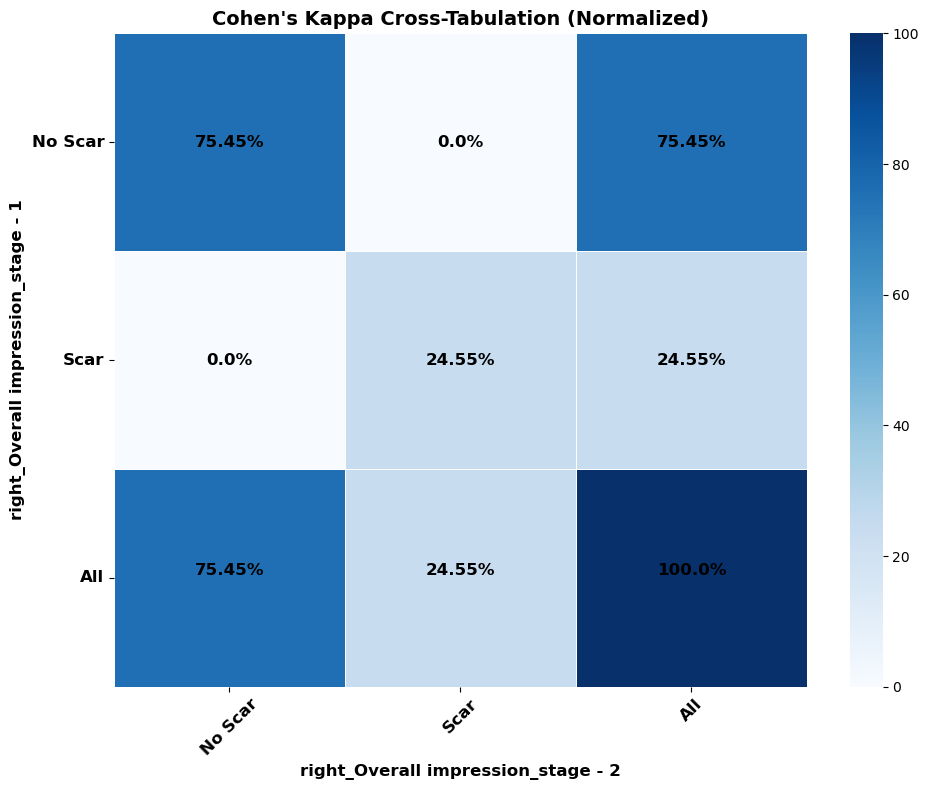

Cohen's Kappa Score: 1.0

Cohen's Kappa Cross-Tabulation (Normalized):
right_Overall impression_second  No Scar   Scar     All
right_Overall impression_first                         
No Scar                            75.45   0.00   75.45
Scar                                0.00  24.55   24.55
All                                75.45  24.55  100.00


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
merged_df.rename(columns={'right_Overall impression_x': 'right_Overall impression_first', 'right_Overall impression_y': 'right_Overall impression_second'}, inplace=True)

# Filter out rows where Patient ID is not present in both stages
merged_df.dropna(subset=['right_Overall impression_first', 'right_Overall impression_second'], inplace=True)

# Calculate cross-tabulation
cross_tab = pd.crosstab(merged_df['right_Overall impression_first'], merged_df['right_Overall impression_second'], margins=True)

# Reorder columns to put <10% after 0%
#columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
columns_order = ['No Scar', 'Scar', 'All']
cross_tab = cross_tab[columns_order]

# Reorder index to ensure <10% is after 0%
#index_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
index_order = ['No Scar', 'Scar', 'All']
cross_tab = cross_tab.reindex(index_order)

# Normalize cross-tabulation to percentages, excluding 'All' row and column
cross_tab_percent = cross_tab.div(cross_tab.iloc[:-1, :-1].sum().sum()) * 100
cross_tab_percent = cross_tab_percent.round(2)

# Plotting the heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percent, annot=False, cmap='Blues', cbar=True, linewidths=0.5)
    

# Annotation for all other rows
for i in range(0, cross_tab_percent.shape[0]):
    for j in range(cross_tab_percent.shape[1]):
        text = f"{cross_tab_percent.iloc[i, j]}%"  # Text to display in each cell
        va = 'center' if i < cross_tab_percent.shape[0] - 1 else 'bottom'  # Adjust y-positioning for the last row
        plt.text(j + 0.5, i + 0.5, text, ha='center', va=va, color='black', fontsize=12, fontweight='bold')

# Adjust plot properties
plt.title("Cohen's Kappa Cross-Tabulation (Normalized)", fontsize=14, fontweight='bold')
plt.xlabel("right_Overall impression_stage - 2", fontsize=12, fontweight='bold')
plt.ylabel("right_Overall impression_stage - 1", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()

# Save the plot as an image
output_image_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Dr-1_right_Overall impression_normalized.png'  # Adjust the path as needed
plt.savefig(output_image_path, bbox_inches='tight')

# Display the plot
plt.show()

# Print Cohen's Kappa Score
print(f"Cohen's Kappa Score: {cohen_kappa}\n")

# Output the cross-tabulation
print("Cohen's Kappa Cross-Tabulation (Normalized):")
print(cross_tab_percent.to_string())


#  Dr.2: DMSA_Data_Dr._Amitabh Arya First stage


In [61]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\2.DMSA_Data_Dr._Amitabh Arya.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 6  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()

# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

# Extract relevant columns
df = df.iloc[header_row + 1:]  # Exclude the header row itself

# Define mapping for preprocessing
percentage_mapping = {
    '': '0%',
    '0': '0%',
    '<10%': '<10%',
    '10-24%': '10-24%',
    '25-49%': '25-49%',
    '49-74%': '50-74%',  # Correcting 49-74% to 50-74%
    '>75%': '>74%',
    '>74%': '>74%'
}

location_mapping = {
    '': 'Not Affected',
    'Upper Pole': 'Upper Pole',
    'Mid Zone': 'Mid Zone',
    'Lower Pole': 'Lower Pole',
    'upper and lower': 'Multiple Zone',
    'mid and lower': 'Multiple Zone',
    'upper and mid': 'Multiple Zone',
    'multiple': 'Multiple Zone'
}

# Preprocess 'left_Overall impression' column
def preprocess_left_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['normal']:
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation']:
        return 'Scar'
    else:
        print(f"Unexpected value in left_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'left_Percentage of kidney involvement' column
def preprocess_left_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in left_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'left_Location of parenchymal defects' column
def preprocess_left_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in left_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Preprocess 'right_Overall impression' column
def preprocess_right_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['normal']:
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation',]:
        return 'Scar'
    else:
        print(f"Unexpected value in right_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'right_Percentage of kidney involvement' column
def preprocess_right_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in right_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'right_Location of parenchymal defects' column
def preprocess_right_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in right_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Apply preprocessing for the left columns
df['left_Overall impression'] = df['left_overall impression'].apply(preprocess_left_impression)
df['left_Percentage of kidney involvement'] = df['left_percentage of kidney involvement'].apply(preprocess_left_percentage)
df['left_Location of parenchymal defects'] = df['left_location of parenchymal defects'].apply(preprocess_left_location)

# Apply preprocessing for the right columns
df['right_Overall impression'] = df['right_overall impression'].apply(preprocess_right_impression)
df['right_Percentage of kidney involvement'] = df['right_percentage of kidney involvement'].apply(preprocess_right_percentage)
df['right_Location of parenchymal defects'] = df['right_location of parenchymal defects'].apply(preprocess_right_location)

# Drop duplicate 'patient id' column and keep only the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

# Save only the required columns
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df[['patient id', 
    'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement',
    'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']].to_excel(output_file_path, index=False)


In [62]:
import pandas as pd

# Load the preprocessed Excel file
preprocessed_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df = pd.read_excel(preprocessed_file_path)

# Remove duplicate rows based on 'Patient Id'
df.drop_duplicates(subset=['patient id'], keep='first', inplace=True)

# Save the file without duplicates
output_file_path_no_duplicates = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df.to_excel(output_file_path_no_duplicates, index=False)


#  Dr.2: DMSA_Data_Dr._Amitabh Arya Second stage


In [63]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\2.DMSA_Data_Dr._Amitabh Arya.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 6  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()

# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

# Extract relevant columns
df = df.iloc[header_row + 1:]  # Exclude the header row itself

# Define mapping for preprocessing
percentage_mapping = {
    '': '0%',
    '0': '0%',
    '<10%': '<10%',
    '10-24%': '10-24%',
    '25-49%': '25-49%',
    '49-74%': '50-74%',  # Correcting 49-74% to 50-74%
    '>75%': '>74%',
    '>74%': '>74%'
}

location_mapping = {
    '': 'Not Affected',
    'Upper Pole': 'Upper Pole',
    'Mid Zone': 'Mid Zone',
    'Lower Pole': 'Lower Pole',
    'upper and lower': 'Multiple Zone',
    'mid and lower': 'Multiple Zone',
    'upper and mid': 'Multiple Zone',
    'multiple': 'Multiple Zone'
}

# Preprocess 'left_Overall impression' column
def preprocess_left_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['normal']:
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation']:
        return 'Scar'
    else:
        print(f"Unexpected value in left_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'left_Percentage of kidney involvement' column
def preprocess_left_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in left_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'left_Location of parenchymal defects' column
def preprocess_left_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in left_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Preprocess 'right_Overall impression' column
def preprocess_right_impression(impression):
    if pd.isna(impression) or impression.strip() == '':
        return 'No Scar'
    elif impression.strip().lower() in ['normal']:
        return 'No Scar'
    elif impression.strip().lower() in ['scar', 'both', 'inflamation',]:
        return 'Scar'
    else:
        print(f"Unexpected value in right_Overall impression: {impression.strip()}")
        return impression

# Preprocess 'right_Percentage of kidney involvement' column
def preprocess_right_percentage(percentage):
    if pd.isna(percentage) or str(percentage).strip() == '':
        return '0%'
    elif str(percentage).strip() in percentage_mapping:
        return percentage_mapping[str(percentage).strip()]
    else:
        print(f"Unexpected value in right_Percentage of kidney involvement: {str(percentage).strip()}")
        return str(percentage).strip()

# Preprocess 'right_Location of parenchymal defects' column
def preprocess_right_location(location):
    if pd.isna(location) or str(location).strip() == '':
        return 'Not Affected'
    elif str(location).strip() in location_mapping:
        return location_mapping[str(location).strip()]
    else:
        print(f"Unexpected value in right_Location of parenchymal defects: {str(location).strip()}")
        return str(location).strip()

# Apply preprocessing for the left columns
df['left_Overall impression'] = df['left_overall impression'].apply(preprocess_left_impression)
df['left_Percentage of kidney involvement'] = df['left_percentage of kidney involvement'].apply(preprocess_left_percentage)
df['left_Location of parenchymal defects'] = df['left_location of parenchymal defects'].apply(preprocess_left_location)

# Apply preprocessing for the right columns
df['right_Overall impression'] = df['right_overall impression'].apply(preprocess_right_impression)
df['right_Percentage of kidney involvement'] = df['right_percentage of kidney involvement'].apply(preprocess_right_percentage)
df['right_Location of parenchymal defects'] = df['right_location of parenchymal defects'].apply(preprocess_right_location)

# Drop duplicate 'patient id' column and keep only the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

# Save only the required columns
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df[['patient id', 
    'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement',
    'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']].to_excel(output_file_path, index=False)


In [10]:
import pandas as pd

# Load the preprocessed Excel file
preprocessed_file_path = 'C:\\Users\\user\\Desktop\\dmsa-21\\first_stage\\Dr.1-Preprocess_first.xlsx'
df = pd.read_excel(preprocessed_file_path)

# Remove duplicate rows based on 'Patient Id'
df.drop_duplicates(subset=['patient id'], keep='first', inplace=True)

# Save the file without duplicates
output_file_path_no_duplicates = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df.to_excel(output_file_path_no_duplicates, index=False)


In [18]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Filter out rows where Patient ID is not present in both stages
merged_df.dropna(subset=['right_Location of parenchymal defects_x', 'right_Location of parenchymal defects_y'], inplace=True)

# Calculate Cohen's Kappa
cohen_kappa = cohen_kappa_score(merged_df['right_Location of parenchymal defects_x'], merged_df['right_Location of parenchymal defects_y'])

# Print Cohen's Kappa score
print("Cohen's Kappa Score:", cohen_kappa)

# Calculate cross-tabulation
cross_tab = pd.crosstab(merged_df['right_Location of parenchymal defects_x'], merged_df['right_Location of parenchymal defects_y'], margins=True)

# Print cross-tabulation
print("Cohen's Kappa Cross-Tabulation:")
print(cross_tab)

#Percentage of kidney involvement
#Location of parenchymal defects
#Overall impression

Cohen's Kappa Score: 1.0
Cohen's Kappa Cross-Tabulation:
right_Location of parenchymal defects_y  Lower Pole  Mid Zone  Not Affected  \
right_Location of parenchymal defects_x                                       
Lower Pole                                       40         0             0   
Mid Zone                                          0        22             0   
Not Affected                                      0         0            95   
Upper Pole                                        0         0             0   
All                                              40        22            95   

right_Location of parenchymal defects_y  Upper Pole  All  
right_Location of parenchymal defects_x                   
Lower Pole                                        0   40  
Mid Zone                                          0   22  
Not Affected                                      0   95  
Upper Pole                                       63   63  
All                                

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
merged_df.rename(columns={'right_Overall impression_x': 'right_Overall impression_first', 'right_Overall impression_y': 'right_Overall impression_second'}, inplace=True)

# Filter out rows where Patient ID is not present in both stages
merged_df.dropna(subset=['right_Overall impression_first', 'right_Overall impression_second'], inplace=True)

# Calculate cross-tabulation
cross_tab = pd.crosstab(merged_df['right_Overall impression_first'], merged_df['right_Overall impression_second'], margins=True)

# Reorder columns to put <10% after 0%
#columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
columns_order = ['No Scar', 'Scar', 'All']
cross_tab = cross_tab[columns_order]

# Reorder index to ensure <10% is after 0%
#index_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
index_order = ['No Scar', 'Scar', 'All']
cross_tab = cross_tab.reindex(index_order)

# Normalize cross-tabulation to percentages, excluding 'All' row and column
cross_tab_percent = cross_tab.div(cross_tab.iloc[:-1, :-1].sum().sum()) * 100
cross_tab_percent = cross_tab_percent.round(2)

# Plotting the heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percent, annot=False, cmap='Blues', cbar=True, linewidths=0.5)
    

# Annotation for all other rows
for i in range(0, cross_tab_percent.shape[0]):
    for j in range(cross_tab_percent.shape[1]):
        text = f"{cross_tab_percent.iloc[i, j]}%"  # Text to display in each cell
        va = 'center' if i < cross_tab_percent.shape[0] - 1 else 'bottom'  # Adjust y-positioning for the last row
        plt.text(j + 0.5, i + 0.5, text, ha='center', va=va, color='black', fontsize=12, fontweight='bold')

# Adjust plot properties
plt.title("Cohen's Kappa Cross-Tabulation (Normalized)", fontsize=14, fontweight='bold')
plt.xlabel("right_Overall impression_stage - 2", fontsize=12, fontweight='bold')
plt.ylabel("right_Overall impression_stage - 1", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()

# Save the plot as an image
output_image_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Dr-2_right_Overall impression_normalized.png'  # Adjust the path as needed
plt.savefig(output_image_path, bbox_inches='tight')

# Display the plot
plt.show()

# Print Cohen's Kappa Score
print(f"Cohen's Kappa Score: {cohen_kappa}\n")

# Output the cross-tabulation
print("Cohen's Kappa Cross-Tabulation (Normalized):")
print(cross_tab_percent.to_string())


In [16]:
import pandas as pd

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Print the column names to identify the correct column names
print("Column names in the first stage DataFrame:")
print(df_first.columns)

# Function to convert string percentages to numerical values
def convert_percentage(value):
    if isinstance(value, str):
        value = value.strip()  # Remove any leading/trailing spaces
        if '-' in value:
            # Convert ranges like '10-24%' to the midpoint (17)
            start, end = value.split('-')
            start = int(start.strip('%'))
            end = int(end.strip('%'))
            return (start + end) / 2
        elif '<' in value:
            # Convert '<10%' to 5
            return float(value.replace('<', '').replace('%', '').strip()) / 2
        elif '>' in value:
            # Convert '>74%' to 80 (assuming a rough midpoint)
            return float(value.replace('>', '').replace('%', '').strip()) + 6
        else:
            # Remove '%' and convert to float
            return float(value.rstrip('%'))
    return value

# Apply the conversion function
df_first['right_Percentage of kidney involvement'] = df_first['right_Percentage of kidney involvement'].apply(convert_percentage)

# Filter data where "left_Overall impression" is "No Scar" but "left_Percentage of kidney involvement" is not 0
filtered_df_first = df_first[(df_first['right_Overall impression'] == 'No Scar') & (df_first['right_Percentage of kidney involvement'] != 0)]

# Print the patient ids, left_Percentage of kidney involvement, and left_Overall impression
print("Details of patients with 'No Scar' but 'right_Percentage of kidney involvement' is not 0% in the first stage:")
print(filtered_df_first[['patient id', 'right_Percentage of kidney involvement', 'right_Overall impression']])


Column names in the first stage DataFrame:
Index(['patient id', 'left_Location of parenchymal defects',
       'left_Overall impression', 'left_Percentage of kidney involvement',
       'right_Location of parenchymal defects', 'right_Overall impression',
       'right_Percentage of kidney involvement'],
      dtype='object')
Details of patients with 'No Scar' but 'right_Percentage of kidney involvement' is not 0% in the first stage:
    patient id  right_Percentage of kidney involvement  \
14        9566                                     5.0   
23       12569                                     5.0   
24       13017                                    17.0   
30       14868                                     5.0   
32       15391                                     5.0   
39       17931                                     5.0   
59       26707                                     5.0   
61       27564                                     5.0   
71       29527                           

In [2]:
import pandas as pd

# Load the first Excel file
file1_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df1 = pd.read_excel(file1_path)

# Load the second Excel file
file2_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df2 = pd.read_excel(file2_path)

# Compare rows between the two dataframes
differences = []

# Iterate over each row in the first dataframe
for idx, row in df1.iterrows():
    # Check if the row is present in the second dataframe
    if not df2[df2.eq(row).all(axis=1)].empty:
        # Rows are identical
        continue
    else:
        # Rows are different
        differences.append(idx)

# If there are no differences
if not differences:
    print("No differences found.")
else:
    print("Differences found in rows at indices:", differences)


No differences found.


# Dr.3 , Dr.4 , Dr.5

In [7]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\2.DMSA_Data_Dr._Amitabh Arya.xlsx'
df = pd.read_excel(file_path, header=None)

# Extract the header row (row 7) and set it as columns
header_row = 3  # 0-based index for the 7th row
df.columns = df.iloc[header_row]

# Rename columns to remove newline characters and duplicates
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.lower()

# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

# Extract relevant columns
df = df.iloc[header_row + 1:]  # Exclude the header row itself

# Define mapping for preprocessing
percentage_mapping = {
    '': '0%',
    '0': '0%',
    '<10%': '<10%',
    '10-24%': '10-24%',
    '25-49%': '25-49%',
    '49-74%': '50-74%',  # Correcting 49-74% to 50-74%
    '>75%': '>74%',
    '>74%': '>74%'
}

location_mapping = {
    '': 'Not Affected',
    'Upper moiety': 'Upper Pole',
    'Upper Pole': 'Upper Pole',
    'Mid Zone': 'Mid Zone',
    'Lower Pole': 'Lower Pole',
    'upper and lower': 'Multiple Zone',
    'mid and lower': 'Multiple Zone',
    'upper and mid': 'Multiple Zone',
    'Upper and Mid': 'Multiple Zone',
    'Upper and mid': 'Multiple Zone',
    'Upper and lower': 'Multiple Zone',
    'Upper and Lower': 'Multiple Zone',
    'Middle and lower': 'Multiple Zone',
    'Upper and middle': 'Multiple Zone',
    #'': 'Multiple Zone',
    'Upper and Lower poles': 'Multiple Zone', 
    'Upper and Lower Pole': 'Multiple Zone',
    'Upper and lower poles': 'Multiple Zone',
    'multiple': 'Multiple Zone',
    'All zones': 'Multiple Zone',
    'all zones': 'Multiple Zone',
    'Upper and Lower Poles': 'Multiple Zone',  
    'Upper and Mid zones': 'Multiple Zone',    
    'Mid and Lower Zones': 'Multiple Zone',     
    'Upper, Mid, lower Zones': 'Multiple Zone',
    'Upper and Mid Zone': 'Multiple Zone',
    'Mid and Lower Zone': 'Multiple Zone'
}

# Preprocess 'left_Overall impression' column
def preprocess_left_impression(impression):
    impression = impression.strip().lower() if isinstance(impression, str) else ''
    if impression in ['', 'normal', 'attenuation', 'motion artifact']:
        return 'No Scar'
    elif impression in ['scar', 'both', 'inflamation', 'dysplastic']:
        return 'Scar'
    else:
        print(f"Unexpected value in left_Overall impression: {impression}")
        return impression

# Preprocess 'left_Percentage of kidney involvement' column
def preprocess_left_percentage(percentage):
    percentage = str(percentage).strip() if isinstance(percentage, str) else ''
    if percentage in percentage_mapping:
        return percentage_mapping[percentage]
    else:
        print(f"Unexpected value in left_Percentage of kidney involvement: {percentage}")
        return percentage

# Preprocess 'left_Location of parenchymal defects' column
def preprocess_left_location(location):
    location = str(location).strip() if isinstance(location, str) else ''
    if location in location_mapping:
        return location_mapping[location]
    else:
        print(f"Unexpected value in left_Location of parenchymal defects: {location}")
        return location

# Preprocess 'right_Overall impression' column
def preprocess_right_impression(impression):
    impression = impression.strip().lower() if isinstance(impression, str) else ''
    if impression in ['', 'normal', 'attenuation', 'motion artifact', 'wedge']:
        return 'No Scar'
    elif impression in ['scar', 'both', 'inflamation', 'dysplastic']:
        return 'Scar'
    else:
        print(f"Unexpected value in right_Overall impression: {impression}")
        return impression

# Preprocess 'right_Percentage of kidney involvement' column
def preprocess_right_percentage(percentage):
    percentage = str(percentage).strip() if isinstance(percentage, str) else ''
    if percentage in percentage_mapping:
        return percentage_mapping[percentage]
    else:
        print(f"Unexpected value in right_Percentage of kidney involvement: {percentage}")
        return percentage

# Preprocess 'right_Location of parenchymal defects' column
def preprocess_right_location(location):
    location = str(location).strip() if isinstance(location, str) else ''
    if location in location_mapping:
        return location_mapping[location]
    else:
        print(f"Unexpected value in right_Location of parenchymal defects: {location}")
        return location

# Apply preprocessing for the left columns
df['left_Overall impression'] = df['left_overall impression'].apply(preprocess_left_impression)
df['left_Percentage of kidney involvement'] = df['left_percentage of kidney involvement'].apply(preprocess_left_percentage)
df['left_Location of parenchymal defects'] = df['left_location of parenchymal defects'].apply(preprocess_left_location)

# Apply preprocessing for the right columns
df['right_Overall impression'] = df['right_overall impression'].apply(preprocess_right_impression)
df['right_Percentage of kidney involvement'] = df['right_percentage of kidney involvement'].apply(preprocess_right_percentage)
df['right_Location of parenchymal defects'] = df['right_location of parenchymal defects'].apply(preprocess_right_location)

# Drop duplicate 'patient id' column and keep only the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

# Save only the required columns
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df[['patient id', 
    'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement',
    'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']].to_excel(output_file_path, index=False)


In [8]:
import pandas as pd

# Load the preprocessed Excel file
preprocessed_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df = pd.read_excel(preprocessed_file_path)

# Remove duplicate rows based on 'Patient Id'
df.drop_duplicates(subset=['patient id'], keep='first', inplace=True)

# Save the file without duplicates
output_file_path_no_duplicates = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df.to_excel(output_file_path_no_duplicates, index=False)


In [9]:
import pandas as pd

# Load the first Excel file
file1_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df1 = pd.read_excel(file1_path)

# Load the second Excel file
file2_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df2 = pd.read_excel(file2_path)

# Compare rows between the two dataframes
differences = []

# Iterate over each row in the first dataframe
for idx, row in df1.iterrows():
    # Check if the row is present in the second dataframe
    if not df2[df2.eq(row).all(axis=1)].empty:
        # Rows are identical
        continue
    else:
        # Rows are different
        differences.append(idx)

# If there are no differences
if not differences:
    print("No differences found.")
else:
    print("Differences found in rows at indices:", differences)


Differences found in rows at indices: [4, 7, 13, 17, 23, 33, 36, 39, 59, 65, 68, 81, 85, 95, 106, 111, 114, 116, 117, 120, 123, 128, 136, 138, 145, 147, 149, 160, 169, 173, 183, 189, 197, 201, 202, 206]


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
#merged_df.rename(columns={'left_Overall impression_x': 'left_Overall impression_first', 'left_Overall impression_y': 'left_Overall impression_second'}, inplace=True)
#merged_df.rename(columns={'right_Overall impression_x': 'right_Overall impression_first', 'right_Overall impression_y': 'right_Overall impression_second'}, inplace=True)
#merged_df.rename(columns={'left_Percentage of kidney involvement_x': 'left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_y': 'left_Percentage of kidney involvement_second'}, inplace=True)
#merged_df.rename(columns={'right_Percentage of kidney involvement_x': 'right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_y': 'right_Percentage of kidney involvement_second'}, inplace=True)
#merged_df.rename(columns={'left_Location of parenchymal defects_x': 'left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_y': 'left_Location of parenchymal defects_second'}, inplace=True)
merged_df.rename(columns={'right_Location of parenchymal defects_x': 'right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_y': 'right_Location of parenchymal defects_second'}, inplace=True)

# Filter out rows where Patient ID is not present in both stages
#merged_df.dropna(subset=['left_Overall impression_first', 'left_Overall impression_second'], inplace=True)
#merged_df.dropna(subset=['right_Overall impression_first', 'right_Overall impression_second'], inplace=True)
#merged_df.dropna(subset=['left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_second'], inplace=True)
#merged_df.dropna(subset=['right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_second'], inplace=True)
#merged_df.dropna(subset=['left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_second'], inplace=True)
merged_df.dropna(subset=['right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_second'], inplace=True)

# Calculate cross-tabulation
#cross_tab = pd.crosstab(merged_df['left_Overall impression_first'], merged_df['left_Overall impression_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['right_Overall impression_first'], merged_df['right_Overall impression_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['left_Percentage of kidney involvement_first'], merged_df['left_Percentage of kidney involvement_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['right_Percentage of kidney involvement_first'], merged_df['right_Percentage of kidney involvement_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['left_Location of parenchymal defects_first'], merged_df['left_Location of parenchymal defects_second'], margins=True)
cross_tab = pd.crosstab(merged_df['right_Location of parenchymal defects_first'], merged_df['right_Location of parenchymal defects_second'], margins=True)

# Reorder columns to put <10% after 0%
#columns_order = ['No Scar', 'Scar', 'All']
#columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
columns_order = ['Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone', 'All']
cross_tab = cross_tab[columns_order]

# Reorder index to ensure <10% is after 0%
#index_order = ['No Scar', 'Scar', 'All']
#index_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
index_order = ['Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone', 'All']
cross_tab = cross_tab.reindex(index_order)

# Plotting the heatmap with annotations
#plt.figure(figsize=(10, 8))
#sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)

# Annotation for all cells
#for i in range(0, cross_tab.shape[0]):
    #for j in range(cross_tab.shape[1]):
        #text = f"{cross_tab.iloc[i, j]}"  # Text to display in each cell
        #va = 'center' if i < cross_tab.shape[0] - 1 else 'bottom'  # Adjust y-positioning for the last row
        #plt.text(j + 0.5, i + 0.5, text, ha='center', va=va, color='black', fontsize=12, fontweight='bold')

# Adjust plot properties
#plt.title("Cohen's Kappa Cross-Tabulation", fontsize=14, fontweight='bold')
#plt.xlabel("left_Overall impression_stage - 2", fontsize=12, fontweight='bold')
#plt.ylabel("left_Overall impression_stage - 1", fontsize=12, fontweight='bold')
#plt.xticks(fontsize=12, fontweight='bold', rotation=45)
#plt.yticks(fontsize=12, fontweight='bold', rotation=0)
#plt.tight_layout()

# Save the plot as an image
#output_image_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Dr-3_left_Overall impression.png'  # Adjust the path as needed
#plt.savefig(output_image_path, bbox_inches='tight')

# Display the plot
#plt.show()

# Print Cohen's Kappa Score
#cohen_kappa = cohen_kappa_score(merged_df['left_Overall impression_first'], merged_df['left_Overall impression_second'])
#cohen_kappa = cohen_kappa_score(merged_df['right_Overall impression_first'], merged_df['right_Overall impression_second'])
#cohen_kappa = cohen_kappa_score(merged_df['left_Percentage of kidney involvement_first'], merged_df['left_Percentage of kidney involvement_second'])
#cohen_kappa = cohen_kappa_score(merged_df['right_Percentage of kidney involvement_first'], merged_df['right_Percentage of kidney involvement_second'])
#cohen_kappa = cohen_kappa_score(merged_df['left_Location of parenchymal defects_first'], merged_df['left_Location of parenchymal defects_second'])
cohen_kappa = cohen_kappa_score(merged_df['right_Location of parenchymal defects_first'], merged_df['right_Location of parenchymal defects_second'])

print(f"Cohen's Kappa Score: {cohen_kappa}\n")

# Output the cross-tabulation
print("Cohen's Kappa Cross-Tabulation:")
print(cross_tab.to_string(index=True))

# Define the path to save the Excel file
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\right_LoPD_cross_tab.xlsx'

# Save the cross-tabulation to an Excel sheet
cross_tab.to_excel(output_file_path, sheet_name='left_LoPD_cross_tab')

print(f"Cross-tabulation saved to {output_file_path}")


Cohen's Kappa Score: 0.6433038402742391

Cohen's Kappa Cross-Tabulation:
right_Location of parenchymal defects_second  Not Affected  Upper Pole  Mid Zone  Lower Pole  Multiple Zone  All
right_Location of parenchymal defects_first                                                                     
Not Affected                                           151           0         0           4              0  155
Upper Pole                                               3          11         1           0              3   18
Mid Zone                                                 0           0         2           0              0    2
Lower Pole                                               5           2         0           9              3   19
Multiple Zone                                            7           5         0           2             12   26
All                                                    166          18         3          15             18  220
Cross-tabulation saved 

All in one

In [22]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.3-Preprocess_second.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.4-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Define evaluations and columns to process
evaluations = [
    ('left_Overall impression', 'Overall impression'),
    ('right_Overall impression', 'Overall impression'),
    ('left_Location of parenchymal defects', 'Location of parenchymal defects'),
    ('right_Location of parenchymal defects', 'Location of parenchymal defects')
]

# Iterate over each evaluation
for col_base, col_name in evaluations:
    col_first = f'{col_base}_x'
    col_second = f'{col_base}_y'
    merged_df.rename(columns={col_first: f'{col_base}_first', col_second: f'{col_base}_second'}, inplace=True)
    col_first = f'{col_base}_first'
    col_second = f'{col_base}_second'

    # Filter out rows where the evaluation is not present in both stages
    merged_df.dropna(subset=[col_first, col_second], inplace=True)

    # Calculate cross-tabulation
    cross_tab = pd.crosstab(merged_df[col_first], merged_df[col_second], margins=True)

    # Print Cohen's Kappa Score
    cohen_kappa = cohen_kappa_score(merged_df[col_first], merged_df[col_second])
    print(f"{col_name} Cohen's Kappa Score: {cohen_kappa}\n")

    # Output the cross-tabulation
    print(f"{col_name} Cross-Tabulation:")
    print(cross_tab.to_string(index=True))

    # Truncate sheet name if it exceeds 31 characters
    max_chars = 31  # Excel sheet name limit
    sheet_name = f'{col_base[:max_chars-12]}_cross_tab' if len(col_base) > max_chars-12 else f'{col_base}_cross_tab'

    # Define the path to save the Excel file
    output_file_path = f'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\Supplementary_Material\\second_stage\\Observer-3&4\\{sheet_name}.xlsx'

    # Save the cross-tabulation to an Excel sheet
    cross_tab.to_excel(output_file_path, sheet_name=sheet_name[:max_chars])

    print(f"Cross-tabulation saved to {output_file_path}\n")


Overall impression Cohen's Kappa Score: 0.5877061469265368

Overall impression Cross-Tabulation:
left_Overall impression_second  No Scar  Scar  All
left_Overall impression_first                     
No Scar                             128    24  152
Scar                                 16    52   68
All                                 144    76  220
Cross-tabulation saved to C:\Users\user\Desktop\dmsa-2\Inter-observer\Supplementary_Material\second_stage\Observer-3&4\left_Overall impres_cross_tab.xlsx

Overall impression Cohen's Kappa Score: 0.7613882863340564

Overall impression Cross-Tabulation:
right_Overall impression_second  No Scar  Scar  All
right_Overall impression_first                     
No Scar                              154    16  170
Scar                                   4    46   50
All                                  158    62  220
Cross-tabulation saved to C:\Users\user\Desktop\dmsa-2\Inter-observer\Supplementary_Material\second_stage\Observer-3&4\right_Overall imp

# Kendall's tau-b for the percentage of kidney involvement

In [28]:
import pandas as pd
from scipy.stats import kendalltau

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID for left kidney
merged_left_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge for left kidney
merged_left_df.rename(columns={
    'left_Percentage of kidney involvement_x': 'left_Percentage of kidney involvement_first', 
    'left_Percentage of kidney involvement_y': 'left_Percentage of kidney involvement_second'
}, inplace=True)

# Merge data based on Patient ID for right kidney
merged_right_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge for right kidney
merged_right_df.rename(columns={
    'right_Percentage of kidney involvement_x': 'right_Percentage of kidney involvement_first', 
    'right_Percentage of kidney involvement_y': 'right_Percentage of kidney involvement_second'
}, inplace=True)

# Filter out rows where Percentage of kidney involvement is not present in both stages for left kidney
merged_left_df.dropna(subset=['left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_second'], inplace=True)

# Filter out rows where Percentage of kidney involvement is not present in both stages for right kidney
merged_right_df.dropna(subset=['right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_second'], inplace=True)

# Calculate cross-tabulation with margins for left kidney
cross_tab_left = pd.crosstab(merged_left_df['left_Percentage of kidney involvement_first'], merged_left_df['left_Percentage of kidney involvement_second'], margins=True)

# Calculate cross-tabulation with margins for right kidney
cross_tab_right = pd.crosstab(merged_right_df['right_Percentage of kidney involvement_first'], merged_right_df['right_Percentage of kidney involvement_second'], margins=True)

# Ensure all categories are included in columns and index for left kidney
columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
cross_tab_left = cross_tab_left.reindex(columns=columns_order, index=columns_order, fill_value=0)

# Ensure all categories are included in columns and index for right kidney
cross_tab_right = cross_tab_right.reindex(columns=columns_order, index=columns_order, fill_value=0)

# Calculate Kendall's Tau-b for left kidney
tau_b_left, p_value_left = kendalltau(merged_left_df['left_Percentage of kidney involvement_first'], merged_left_df['left_Percentage of kidney involvement_second'])

# Calculate Kendall's Tau-b for right kidney
tau_b_right, p_value_right = kendalltau(merged_right_df['right_Percentage of kidney involvement_first'], merged_right_df['right_Percentage of kidney involvement_second'])

# Print Kendall's Tau-b and P-value for left kidney
print("Left Kidney:")
print(f"Kendall's Tau-b: {tau_b_left}")
print(f"P-value: {p_value_left}\n")

# Print Kendall's Tau-b and P-value for right kidney
print("Right Kidney:")
print(f"Kendall's Tau-b: {tau_b_right}")
print(f"P-value: {p_value_right}\n")

# Save the cross-tabulations to Excel files for left and right kidneys
output_left_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\Supplementary_Material\\second_stage\\Observer-1&2\\left_PoKI_cross_tab.xlsx'
output_right_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\Supplementary_Material\\second_stage\\Observer-1&2\\right_PoKI_cross_tab.xlsx'

# Save the cross-tabulation for left kidney to an Excel sheet
cross_tab_left.to_excel(output_left_file_path, sheet_name='left_PoKI_cross_tab.xlsx')

# Save the cross-tabulation for right kidney to an Excel sheet
cross_tab_right.to_excel(output_right_file_path, sheet_name='right_PoKI_cross_tab.xlsx')

print(f"Cross-tabulations saved to {output_left_file_path} and {output_right_file_path}")


Left Kidney:
Kendall's Tau-b: 0.2331384343309987
P-value: 6.813458428802495e-05

Right Kidney:
Kendall's Tau-b: 0.2254185420732195
P-value: 0.00010833435495241282

Cross-tabulations saved to C:\Users\user\Desktop\dmsa-2\Inter-observer\Supplementary_Material\second_stage\Observer-1&2\left_PoKI_cross_tab.xlsx and C:\Users\user\Desktop\dmsa-2\Inter-observer\Supplementary_Material\second_stage\Observer-1&2\right_PoKI_cross_tab.xlsx


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
merged_df.rename(columns={'right_Percentage of kidney involvement_x': 'right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_y': 'right_Percentage of kidney involvement_second'}, inplace=True)

# Filter out rows where Percentage of kidney involvement is not present in both stages
merged_df.dropna(subset=['right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_second'], inplace=True)

# Calculate cross-tabulation with margins
cross_tab = pd.crosstab(merged_df['right_Percentage of kidney involvement_first'], merged_df['right_Percentage of kidney involvement_second'], margins=True)

# Ensure all categories are included in columns and index
columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
cross_tab = cross_tab.reindex(columns=columns_order, fill_value=0)
cross_tab = cross_tab.reindex(index=columns_order, fill_value=0)

# Calculate Kendall's Tau-b
tau_b, p_value = kendalltau(merged_df['right_Percentage of kidney involvement_first'], merged_df['right_Percentage of kidney involvement_second'])

# Print Kendall's Tau-b and P-value
print(f"Kendall's Tau-b: {tau_b}")
print(f"P-value: {p_value}\n")

# Output the cross-tabulation
print("Kendall's Tau-b Cross-Tabulation:")
print(cross_tab.to_string(index=True))

# Define the path to save the Excel file
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\Supplementary_Material\\first_stage\\Observer-3&4\\right_PoKI_cross_tab.xlsx'

# Save the cross-tabulation to an Excel sheet
cross_tab.to_excel(output_file_path, sheet_name='right_PoKI_cross_tab.xlsx')

print(f"Cross-tabulation saved to {output_file_path}")


Kendall's Tau-b: 0.9361548946381406
P-value: 1.4769478039632477e-63

Kendall's Tau-b Cross-Tabulation:
right_Percentage of kidney involvement_second  0%  <10%  10-24%  25-49%  50-74%  >74%  All
right_Percentage of kidney involvement_first                                              
0%                                             97     0       0       0       0     0   97
<10%                                            0    31       4       1       1     0   37
10-24%                                          0     1      30       6       2     0   39
25-49%                                          0     0       0      18       0     0   18
50-74%                                          0     1       0       0       8     0    9
>74%                                            0     0       1       1       0    18   20
All                                            97    33      35      26      11    18  220
Cross-tabulation saved to C:\Users\user\Desktop\dmsa-2\Intra-observer\right_Po

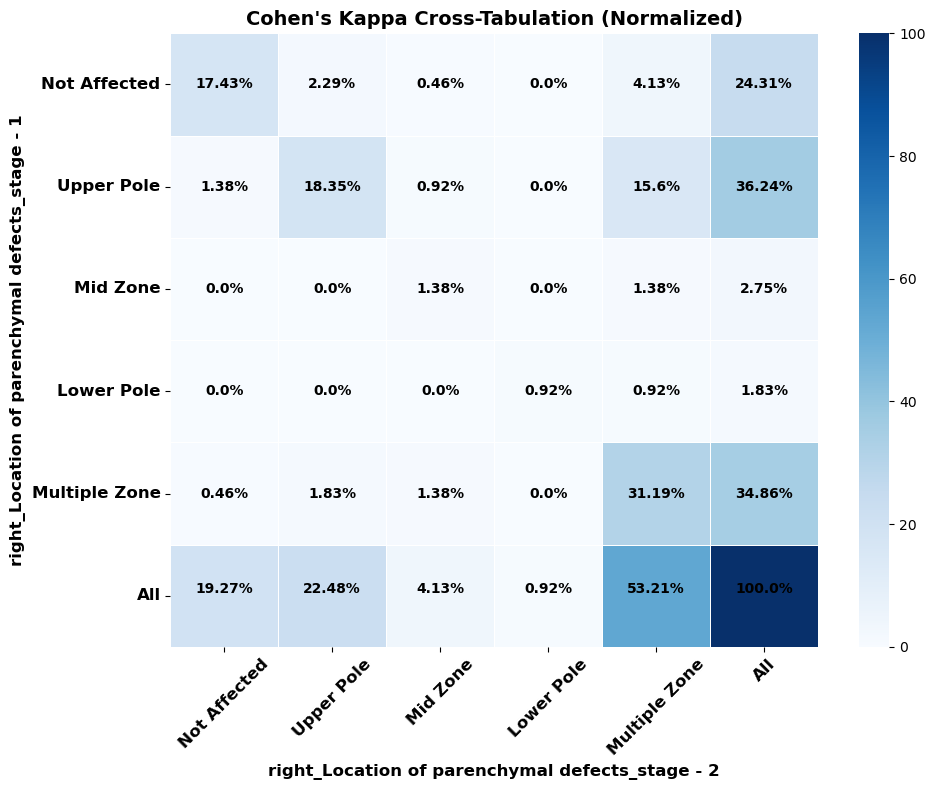

Cohen's Kappa Score: 0.5512611754585395

Cohen's Kappa Cross-Tabulation (Normalized):
right_Location of parenchymal defects_second  Not Affected  Upper Pole  Mid Zone  Lower Pole  Multiple Zone     All
right_Location of parenchymal defects_first                                                                        
Not Affected                                         17.43        2.29      0.46        0.00           4.13   24.31
Upper Pole                                            1.38       18.35      0.92        0.00          15.60   36.24
Mid Zone                                              0.00        0.00      1.38        0.00           1.38    2.75
Lower Pole                                            0.00        0.00      0.00        0.92           0.92    1.83
Multiple Zone                                         0.46        1.83      1.38        0.00          31.19   34.86
All                                                  19.27       22.48      4.13        0.92          

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.3-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.3-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
#merged_df.rename(columns={'left_Overall impression_x': 'left_Overall impression_first', 'left_Overall impression_y': 'left_Overall impression_second'}, inplace=True)
#merged_df.rename(columns={'right_Overall impression_x': 'right_Overall impression_first', 'right_Overall impression_y': 'right_Overall impression_second'}, inplace=True)
merged_df.rename(columns={'left_Percentage of kidney involvement_x': 'left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_y': 'left_Percentage of kidney involvement_second'}, inplace=True)
#merged_df.rename(columns={'right_Percentage of kidney involvement_x': 'right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_y': 'right_Percentage of kidney involvement_second'}, inplace=True)
#merged_df.rename(columns={'left_Location of parenchymal defects_x': 'left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_y': 'left_Location of parenchymal defects_second'}, inplace=True)
#merged_df.rename(columns={'right_Location of parenchymal defects_x': 'right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_y': 'right_Location of parenchymal defects_second'}, inplace=True)

# Filter out rows where Patient ID is not present in both stages
#merged_df.dropna(subset=['left_Overall impression_first', 'left_Overall impression_second'], inplace=True)
#merged_df.dropna(subset=['right_Overall impression_first', 'right_Overall impression_second'], inplace=True)
merged_df.dropna(subset=['left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_second'], inplace=True)
#merged_df.dropna(subset=['right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_second'], inplace=True)
#merged_df.dropna(subset=['left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_second'], inplace=True)
#merged_df.dropna(subset=['right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_second'], inplace=True)

# Calculate cross-tabulation
#cross_tab = pd.crosstab(merged_df['left_Overall impression_first'], merged_df['left_Overall impression_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['right_Overall impression_first'], merged_df['right_Overall impression_second'], margins=True)
cross_tab = pd.crosstab(merged_df['left_Percentage of kidney involvement_first'], merged_df['left_Percentage of kidney involvement_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['right_Percentage of kidney involvement_first'], merged_df['right_Percentage of kidney involvement_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['left_Location of parenchymal defects_first'], merged_df['left_Location of parenchymal defects_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['right_Location of parenchymal defects_first'], merged_df['right_Location of parenchymal defects_second'], margins=True)

# Reorder columns to put <10% after 0%
#columns_order = ['No Scar', 'Scar', 'All']
columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
#columns_order = ['Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone', 'All']
cross_tab = cross_tab[columns_order]

# Reorder index to ensure <10% is after 0%
#index_order = ['No Scar', 'Scar', 'All']
index_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
#index_order = ['Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone', 'All']
cross_tab = cross_tab.reindex(index_order)

# Normalize cross-tabulation to percentages, excluding 'All' row and column
cross_tab_percent = cross_tab.div(cross_tab.iloc[:-1, :-1].sum().sum()) * 100
cross_tab_percent = cross_tab_percent.round(2)

# Plotting the heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percent, annot=False, cmap='Blues', cbar=True, linewidths=0.5)
    

# Annotation for all other rows
for i in range(0, cross_tab_percent.shape[0]):
    for j in range(cross_tab_percent.shape[1]):
        text = f"{cross_tab_percent.iloc[i, j]}%"  # Text to display in each cell
        va = 'center' if i < cross_tab_percent.shape[0] - 1 else 'bottom'  # Adjust y-positioning for the last row
        plt.text(j + 0.5, i + 0.5, text, ha='center', va=va, color='black', fontsize=10, fontweight='bold')

# Adjust plot properties
plt.title("Cohen's Kappa Cross-Tabulation (Normalized)", fontsize=14, fontweight='bold')
#plt.xlabel("left_Overall impression_stage - 2", fontsize=12, fontweight='bold')
#plt.ylabel("left_Overall impression_stage - 1", fontsize=12, fontweight='bold')
#plt.xlabel("right_Overall impression_stage - 2", fontsize=12, fontweight='bold')
#plt.ylabel("right_Overall impression_stage - 1", fontsize=12, fontweight='bold')
plt.xlabel("left_Percentage of kidney involvement_stage - 2", fontsize=12, fontweight='bold')
plt.ylabel("left_Percentage of kidney involvement_stage - 1", fontsize=12, fontweight='bold')
#plt.xlabel("right_Percentage of kidney involvement_stage - 2", fontsize=12, fontweight='bold')
#plt.ylabel("right_Percentage of kidney involvement_stage - 1", fontsize=12, fontweight='bold')
#plt.xlabel("left_Location of parenchymal defects_stage - 2", fontsize=12, fontweight='bold')
#plt.ylabel("left_Location of parenchymal defects_stage - 1", fontsize=12, fontweight='bold')
#plt.xlabel("right_Location of parenchymal defects_stage - 2", fontsize=12, fontweight='bold')
#plt.ylabel("right_Location of parenchymal defects_stage - 1", fontsize=12, fontweight='bold')

plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()

# Save the plot as an image
output_image_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Dr-3_right_Location of parenchymal defects_normalized.png'  # Adjust the path as needed
plt.savefig(output_image_path, bbox_inches='tight')

# Display the plot
plt.show()

# Print Cohen's Kappa Score
print(f"Cohen's Kappa Score: {cohen_kappa}\n")

# Output the cross-tabulation
print("Cohen's Kappa Cross-Tabulation (Normalized):")
print(cross_tab_percent.to_string())


All in one

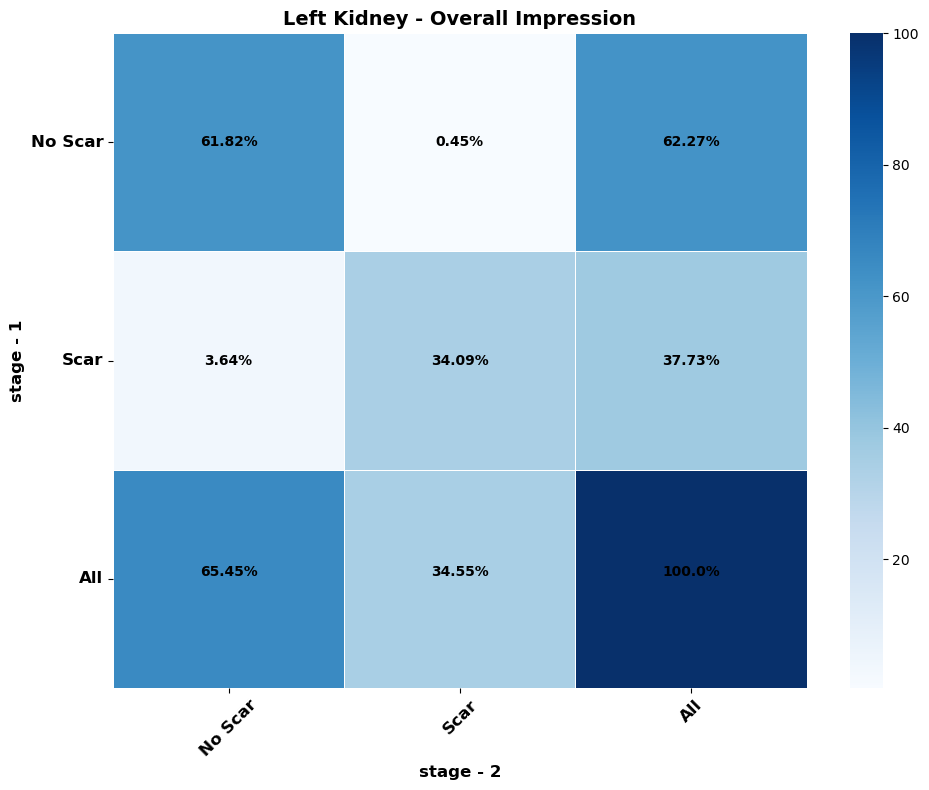

Left Kidney - Overall Impression Cohen's Kappa Score: 0.9114648542300126

Left Kidney - Overall Impression Cross-Tabulation (Normalized):
left_Overall impression_second  No Scar   Scar     All
left_Overall impression_first                         
No Scar                           61.82   0.45   62.27
Scar                               3.64  34.09   37.73
All                               65.45  34.55  100.00


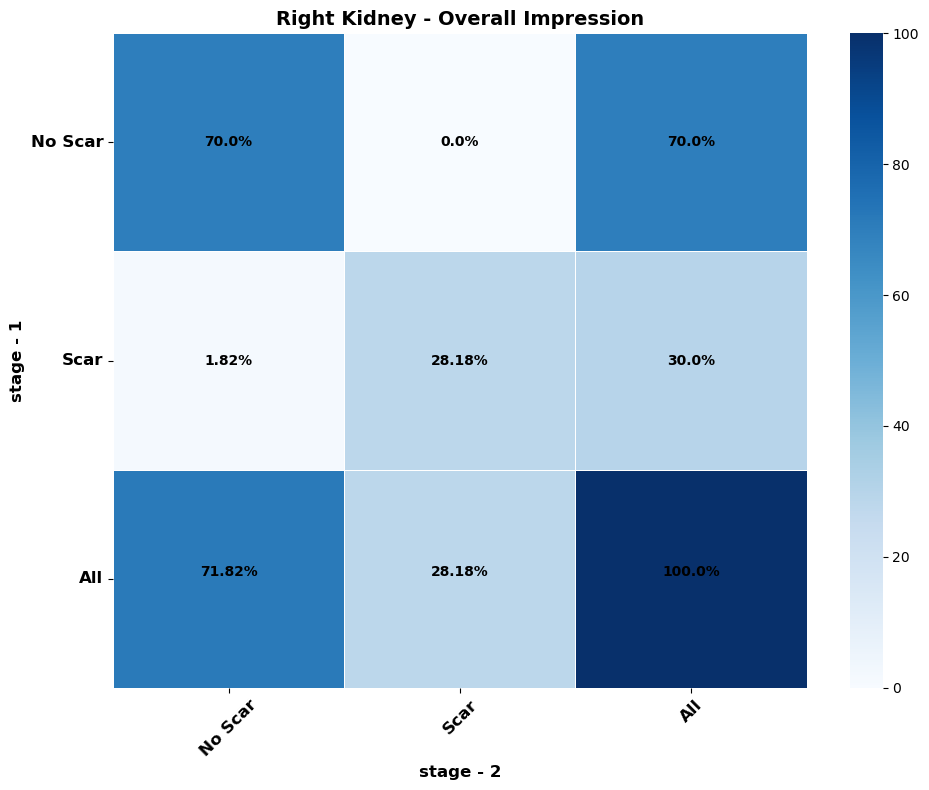

Right Kidney - Overall Impression Cohen's Kappa Score: 0.9559471365638766

Right Kidney - Overall Impression Cross-Tabulation (Normalized):
right_Overall impression_second  No Scar   Scar    All
right_Overall impression_first                        
No Scar                            70.00   0.00   70.0
Scar                                1.82  28.18   30.0
All                                71.82  28.18  100.0


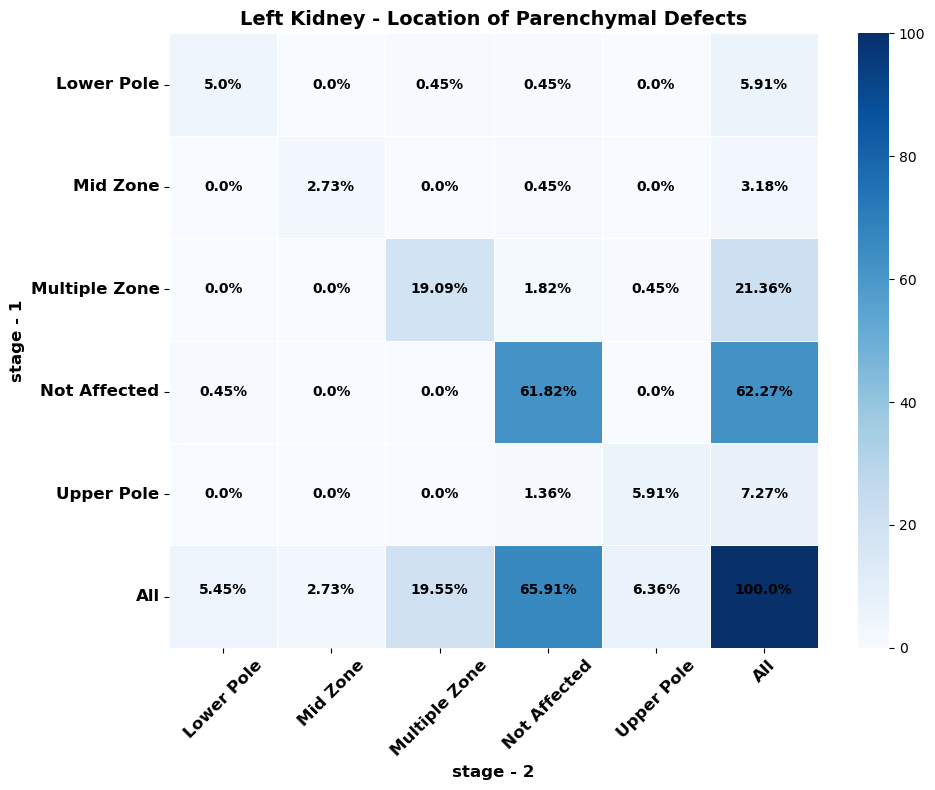

Left Kidney - Location of Parenchymal Defects Cohen's Kappa Score: 0.8988195615514334

Left Kidney - Location of Parenchymal Defects Cross-Tabulation (Normalized):
left_Location of parenchymal defects_second  Lower Pole  Mid Zone  Multiple Zone  Not Affected  Upper Pole     All
left_Location of parenchymal defects_first                                                                        
Lower Pole                                         5.00      0.00           0.45          0.45        0.00    5.91
Mid Zone                                           0.00      2.73           0.00          0.45        0.00    3.18
Multiple Zone                                      0.00      0.00          19.09          1.82        0.45   21.36
Not Affected                                       0.45      0.00           0.00         61.82        0.00   62.27
Upper Pole                                         0.00      0.00           0.00          1.36        5.91    7.27
All                            

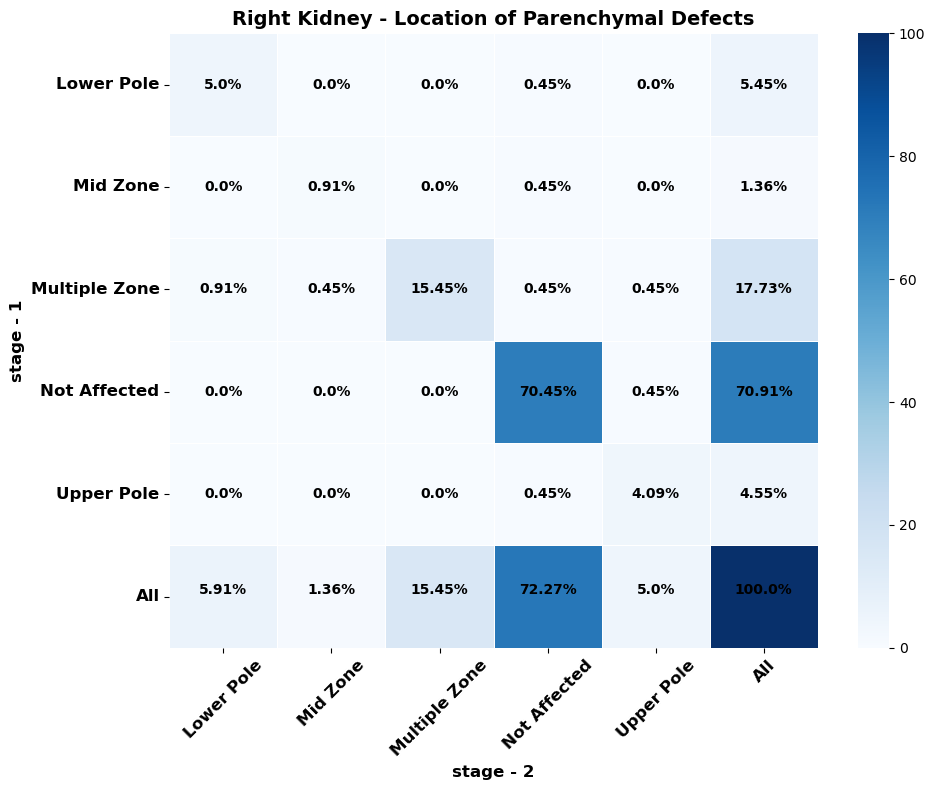

Right Kidney - Location of Parenchymal Defects Cohen's Kappa Score: 0.9099795408047283

Right Kidney - Location of Parenchymal Defects Cross-Tabulation (Normalized):
right_Location of parenchymal defects_second  Lower Pole  Mid Zone  Multiple Zone  Not Affected  Upper Pole     All
right_Location of parenchymal defects_first                                                                        
Lower Pole                                          5.00      0.00           0.00          0.45        0.00    5.45
Mid Zone                                            0.00      0.91           0.00          0.45        0.00    1.36
Multiple Zone                                       0.91      0.45          15.45          0.45        0.45   17.73
Not Affected                                        0.00      0.00           0.00         70.45        0.45   70.91
Upper Pole                                          0.00      0.00           0.00          0.45        4.09    4.55
All                   

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.5-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.5-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
merged_df.rename(columns={
    'left_Overall impression_x': 'left_Overall impression_first', 
    'left_Overall impression_y': 'left_Overall impression_second',
    'right_Overall impression_x': 'right_Overall impression_first',
    'right_Overall impression_y': 'right_Overall impression_second',
    'left_Location of parenchymal defects_x': 'left_Location of parenchymal defects_first',
    'left_Location of parenchymal defects_y': 'left_Location of parenchymal defects_second',
    'right_Location of parenchymal defects_x': 'right_Location of parenchymal defects_first',
    'right_Location of parenchymal defects_y': 'right_Location of parenchymal defects_second'
}, inplace=True)

# Filter out rows where Patient ID is not present in both stages
merged_df.dropna(subset=['left_Overall impression_first', 'left_Overall impression_second', 
                         'right_Overall impression_first', 'right_Overall impression_second',
                         'left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_second',
                         'right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_second'], 
                inplace=True)

# Define function to generate cross-tabulation and heatmap
def generate_heatmap_and_kappa(df, col1, col2, title, xlabel, ylabel, output_path):
    cross_tab = pd.crosstab(df[col1], df[col2], margins=True)
    
    # Normalize cross-tabulation to percentages, excluding 'All' row and column
    cross_tab_percent = cross_tab.div(cross_tab.iloc[:-1, :-1].sum().sum()) * 100
    cross_tab_percent = cross_tab_percent.round(2)
    
    # Plotting the heatmap with annotations
    plt.figure(figsize=(10, 8))
    sns.heatmap(cross_tab_percent, annot=False, cmap='Blues', cbar=True, linewidths=0.5)
    
    # Annotation for all other rows
    for i in range(0, cross_tab_percent.shape[0]):
        for j in range(cross_tab_percent.shape[1]):
            text = f"{cross_tab_percent.iloc[i, j]}%"  # Text to display in each cell
            va = 'center' if i < cross_tab_percent.shape[0] - 1 else 'bottom'  # Adjust y-positioning for the last row
            plt.text(j + 0.5, i + 0.5, text, ha='center', va=va, color='black', fontsize=10, fontweight='bold')

    # Adjust plot properties
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold', rotation=45)
    plt.yticks(fontsize=12, fontweight='bold', rotation=0)
    plt.tight_layout()

    # Save the plot as an image
    plt.savefig(output_path, bbox_inches='tight')

    # Display the plot
    plt.show()

    # Print Cohen's Kappa Score
    cohen_kappa = cohen_kappa_score(df[col1], df[col2])
    print(f"{title} Cohen's Kappa Score: {cohen_kappa}\n")

    # Output the cross-tabulation
    print(f"{title} Cross-Tabulation (Normalized):")
    print(cross_tab_percent.to_string())

# Generate and save heatmaps and kappa scores for each metric
generate_heatmap_and_kappa(merged_df, 'left_Overall impression_first', 'left_Overall impression_second', 
                           "Left Kidney - Overall Impression", "stage - 2", "stage - 1", 
                           'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Observer-5\\Dr-5_left_Overall_impression_normalized.png')

generate_heatmap_and_kappa(merged_df, 'right_Overall impression_first', 'right_Overall impression_second', 
                           "Right Kidney - Overall Impression", "stage - 2", "stage - 1", 
                           'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Observer-5\\Dr-5_right_Overall_impression_normalized.png')

generate_heatmap_and_kappa(merged_df, 'left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_second', 
                           "Left Kidney - Location of Parenchymal Defects", "stage - 2", "stage - 1", 
                           'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Observer-5\\Dr-5_left_Location_of_parenchymal_defects_normalized.png')

generate_heatmap_and_kappa(merged_df, 'right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_second', 
                           "Right Kidney - Location of Parenchymal Defects", "stage - 2", "stage - 1", 
                           'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Observer-5\\Dr-5_right_Location_of_parenchymal_defects_normalized.png')


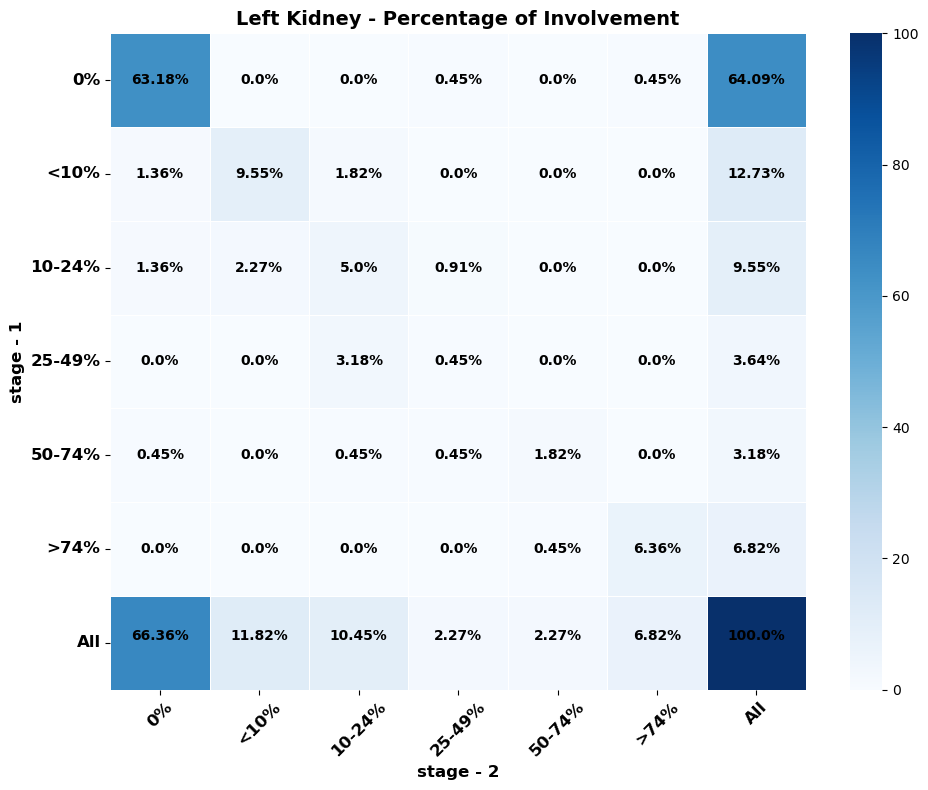

Left Kidney - Percentage of Involvement Kendall's Tau-b: 0.8696180376955241
P-value: 4.0657835795271965e-48

Left Kidney - Percentage of Involvement Cross-Tabulation (Normalized):
left_Percentage of kidney involvement_second     0%   <10%  10-24%  25-49%  50-74%  >74%     All
left_Percentage of kidney involvement_first                                                     
0%                                            63.18   0.00    0.00    0.45    0.00  0.45   64.09
<10%                                           1.36   9.55    1.82    0.00    0.00  0.00   12.73
10-24%                                         1.36   2.27    5.00    0.91    0.00  0.00    9.55
25-49%                                         0.00   0.00    3.18    0.45    0.00  0.00    3.64
50-74%                                         0.45   0.00    0.45    0.45    1.82  0.00    3.18
>74%                                           0.00   0.00    0.00    0.00    0.45  6.36    6.82
All                                         

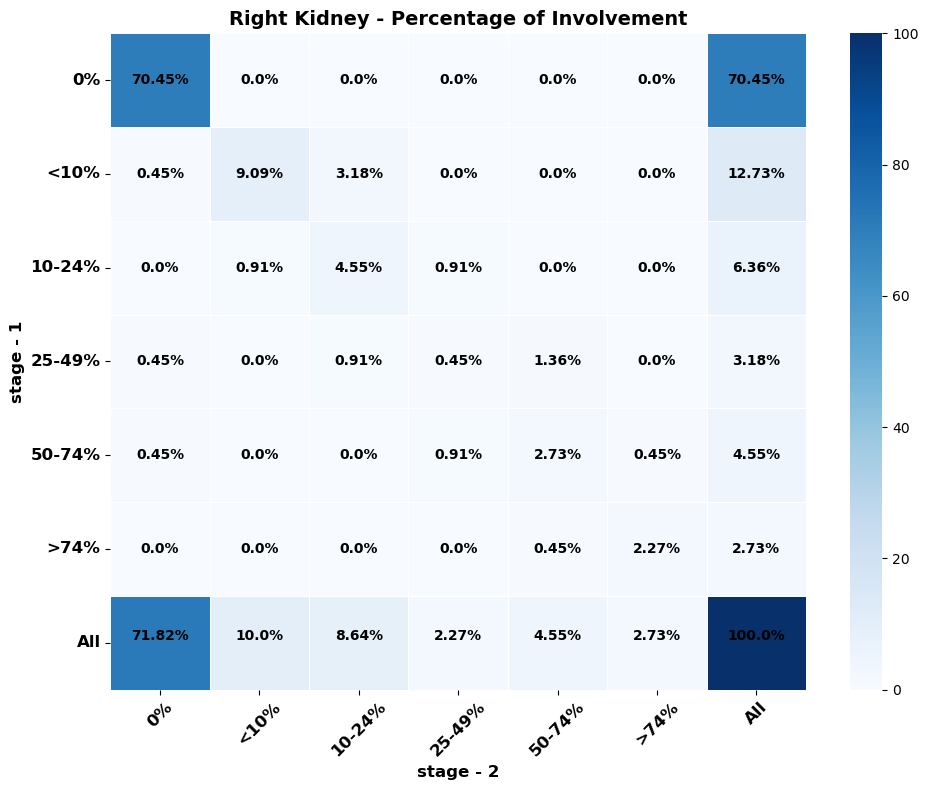

Right Kidney - Percentage of Involvement Kendall's Tau-b: 0.9139809885280724
P-value: 7.703856227162124e-51

Right Kidney - Percentage of Involvement Cross-Tabulation (Normalized):
right_Percentage of kidney involvement_second     0%   <10%  10-24%  25-49%  50-74%  >74%     All
right_Percentage of kidney involvement_first                                                     
0%                                             70.45   0.00    0.00    0.00    0.00  0.00   70.45
<10%                                            0.45   9.09    3.18    0.00    0.00  0.00   12.73
10-24%                                          0.00   0.91    4.55    0.91    0.00  0.00    6.36
25-49%                                          0.45   0.00    0.91    0.45    1.36  0.00    3.18
50-74%                                          0.45   0.00    0.00    0.91    2.73  0.45    4.55
>74%                                            0.00   0.00    0.00    0.00    0.45  2.27    2.73
All                                

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.5-Preprocess_second.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
merged_df.rename(columns={
    'left_Percentage of kidney involvement_x': 'left_Percentage of kidney involvement_first', 
    'left_Percentage of kidney involvement_y': 'left_Percentage of kidney involvement_second',
    'right_Percentage of kidney involvement_x': 'right_Percentage of kidney involvement_first',
    'right_Percentage of kidney involvement_y': 'right_Percentage of kidney involvement_second'
}, inplace=True)

# Filter out rows where Percentage of kidney involvement is not present in both stages
merged_df.dropna(subset=['left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_second',
                         'right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_second'], 
                inplace=True)

# Define function to generate cross-tabulation, heatmap, and calculate Kendall's Tau-b
def generate_heatmap_and_tau_b(df, col1, col2, title, xlabel, ylabel, output_path):
    cross_tab = pd.crosstab(df[col1], df[col2], margins=True)
    
    # Ensure all categories are included in columns and index
    columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
    cross_tab = cross_tab.reindex(columns=columns_order, fill_value=0)
    cross_tab = cross_tab.reindex(index=columns_order, fill_value=0)
    
    # Normalize cross-tabulation to percentages, excluding 'All' row and column
    cross_tab_percent = cross_tab.div(cross_tab.iloc[:-1, :-1].sum().sum()) * 100
    cross_tab_percent = cross_tab_percent.round(2)
    
    # Plotting the heatmap with annotations
    plt.figure(figsize=(10, 8))
    sns.heatmap(cross_tab_percent, annot=False, cmap='Blues', cbar=True, linewidths=0.5)
    
    # Annotation for all other rows
    for i in range(0, cross_tab_percent.shape[0]):
        for j in range(cross_tab_percent.shape[1]):
            text = f"{cross_tab_percent.iloc[i, j]}%"  # Text to display in each cell
            va = 'center' if i < cross_tab_percent.shape[0] - 1 else 'bottom'  # Adjust y-positioning for the last row
            plt.text(j + 0.5, i + 0.5, text, ha='center', va=va, color='black', fontsize=10, fontweight='bold')

    # Adjust plot properties
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold', rotation=45)
    plt.yticks(fontsize=12, fontweight='bold', rotation=0)
    plt.tight_layout()

    # Save the plot as an image
    plt.savefig(output_path, bbox_inches='tight')

    # Display the plot
    plt.show()

    # Calculate Kendall's Tau-b
    tau_b, p_value = kendalltau(df[col1], df[col2])

    # Print Kendall's Tau-b and P-value
    print(f"{title} Kendall's Tau-b: {tau_b}")
    print(f"P-value: {p_value}\n")

    # Output the cross-tabulation
    print(f"{title} Cross-Tabulation (Normalized):")
    print(cross_tab_percent.to_string())

    return cross_tab_percent

# Generate and save heatmaps and tau-b scores for each metric
left_cross_tab_percent = generate_heatmap_and_tau_b(merged_df, 'left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_second', 
                                                    "Left Kidney - Percentage of Involvement", "stage - 2", "stage - 1", 
                                                    'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Observer-5\\Dr-5_left_PoKI_normalized.png')

right_cross_tab_percent = generate_heatmap_and_tau_b(merged_df, 'right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_second', 
                                                     "Right Kidney - Percentage of Involvement", "stage - 2", "stage - 1", 
                                                     'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Observer-5\\Dr-5_right_PoKI_normalized.png')

# Define the path to save the Excel file
output_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Observer-5\\PoKI_cross_tab.xlsx'

# Save the cross-tabulations to an Excel sheet
with pd.ExcelWriter(output_file_path) as writer:
    left_cross_tab_percent.to_excel(writer, sheet_name='Dr-5_left_PoKI_cross_tab')
    right_cross_tab_percent.to_excel(writer, sheet_name='Dr-5_right_PoKI_cross_tab')

print(f"Cross-tabulations saved to {output_file_path}")


# Inter-Observer agreement: first and second stage (All Dr.)

In [1]:
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

# Load data for each observer
observer_files = [
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.3-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.4-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.5-Preprocess_second.xlsx'
]

# Load and preprocess data
dfs = []
for file_path in observer_files:
    df = pd.read_excel(file_path)
    print(f"Loaded {file_path} with columns: {df.columns.tolist()}")
    #df = df[['patient id', 'left_Overall impression']].copy()
    #df['left_Overall impression'] = df['left_Overall impression'].str.strip().str.lower().map({'scar': 1, 'no scar': 0})
    df = df[['patient id', 'right_Overall impression']].copy()
    df['right_Overall impression'] = df['right_Overall impression'].str.strip().str.lower().map({'scar': 1, 'no scar': 0})
    dfs.append(df)

# Merge all observer data on patient id
merged_df = dfs[0]
for i, df in enumerate(dfs[1:], start=2):
    merged_df = pd.merge(merged_df, df, on='patient id', suffixes=('', f'_observer{i}'))

# Rename columns to reflect observer numbers
merged_df.columns = ['patient id', 'observer1', 'observer2', 'observer3', 'observer4', 'observer5']

# Check the structure of the merged DataFrame
print(f"Merged DataFrame columns: {merged_df.columns.tolist()}")
print(f"Merged DataFrame shape: {merged_df.shape}")

# Prepare data for Fleiss' kappa calculation
kappa_data = []
for index, row in merged_df.iterrows():
    counts = row[1:].value_counts().reindex([0, 1], fill_value=0).tolist()
    kappa_data.append(counts)

# Calculate Fleiss' kappa
kappa_score = fleiss_kappa(kappa_data)
print(f"Fleiss' Kappa Score: {kappa_score}")

# Cross tabulation for the first 10 patients and the last patient
cross_tab = []
for index, row in pd.concat([merged_df.head(10), merged_df.tail(1)]).iterrows():
    counts = row[1:].value_counts().reindex([0, 1], fill_value=0).tolist()
    cross_tab.append([row['patient id']] + counts)

# Convert to DataFrame for pretty printing
cross_tab_df = pd.DataFrame(cross_tab, columns=['Patient', 'No Scar', 'Scar'])
print(cross_tab_df.to_string(index=False))

# Save the cross tabulation to an Excel file if needed
output_cross_tab_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\cross_tab6.xlsx'
cross_tab_df.to_excel(output_cross_tab_path, index=False)


Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.1-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.2-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.3-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desk

ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

In [83]:
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

# Load data for each observer
observer_files = [
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.3-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.4-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.5-Preprocess_second.xlsx'
]

# Define mapping for "percentage of kidney involvement"
percentage_mapping = {
    '0%': 0,
    '<10%': 1,
    '10-24%': 2,
    '25-49%': 3,
    '50-74%': 4,
    '>74%': 5
}

# Load and preprocess data
dfs = []
for file_path in observer_files:
    df = pd.read_excel(file_path)
    print(f"Loaded {file_path} with columns: {df.columns.tolist()}")
    #df = df[['patient id', 'left_Percentage of kidney involvement']].copy()
    #df['left_Percentage of kidney involvement'] = df['left_Percentage of kidney involvement'].str.strip().map(percentage_mapping)
    df = df[['patient id', 'right_Percentage of kidney involvement']].copy()
    df['right_Percentage of kidney involvement'] = df['right_Percentage of kidney involvement'].str.strip().map(percentage_mapping)
    dfs.append(df)

# Merge all observer data on patient id
merged_df = dfs[0]
for i, df in enumerate(dfs[1:], start=2):
    merged_df = pd.merge(merged_df, df, on='patient id', suffixes=('', f'_observer{i}'))

# Rename columns to reflect observer numbers
merged_df.columns = ['patient id', 'observer1', 'observer2', 'observer3', 'observer4', 'observer5']

# Check the structure of the merged DataFrame
print(f"Merged DataFrame columns: {merged_df.columns.tolist()}")
print(f"Merged DataFrame shape: {merged_df.shape}")

# Prepare data for Fleiss' kappa calculation
kappa_data = []
for index, row in merged_df.iterrows():
    counts = row[1:].value_counts().reindex(range(6), fill_value=0).tolist()
    kappa_data.append(counts)

# Calculate Fleiss' kappa
kappa_score = fleiss_kappa(kappa_data)
print(f"Fleiss' Kappa Score: {kappa_score}")

# Cross tabulation for the first 10 patients and the last patient
cross_tab = []
for index, row in pd.concat([merged_df.head(10), merged_df.tail(1)]).iterrows():
    counts = row[1:].value_counts().reindex(range(6), fill_value=0).tolist()
    cross_tab.append([row['patient id']] + counts)

# Convert to DataFrame for pretty printing
cross_tab_df = pd.DataFrame(cross_tab, columns=['Patient ID', '0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%'])
print(cross_tab_df.to_string(index=False))

# Save the cross tabulation to an Excel file if needed
output_cross_tab_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\cross_tab8.xlsx'
cross_tab_df.to_excel(output_cross_tab_path, index=False)


Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.1-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.2-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.3-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desk

In [87]:
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

# Load data for each observer
observer_files = [
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.1-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.2-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.3-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.4-Preprocess_second.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\second_stage\\Dr.5-Preprocess_second.xlsx'
]

# Define mapping for "left_Location of parenchymal defects"
location_mapping = {
    'Not Affected': 0,
    'Upper Pole': 1,
    'Mid Zone': 2,
    'Lower Pole': 3,
    'Multiple Zone': 4
}

# Load and preprocess data
dfs = []
for file_path in observer_files:
    df = pd.read_excel(file_path)
    print(f"Loaded {file_path} with columns: {df.columns.tolist()}")
    #df = df[['patient id', 'left_Location of parenchymal defects']].copy()
    #df['left_Location of parenchymal defects'] = df['left_Location of parenchymal defects'].str.strip().map(location_mapping)
    df = df[['patient id', 'right_Location of parenchymal defects']].copy()
    df['right_Location of parenchymal defects'] = df['right_Location of parenchymal defects'].str.strip().map(location_mapping)
    dfs.append(df)

# Merge all observer data on patient id
merged_df = dfs[0]
for i, df in enumerate(dfs[1:], start=2):
    merged_df = pd.merge(merged_df, df, on='patient id', suffixes=('', f'_observer{i}'))

# Rename columns to reflect observer numbers
merged_df.columns = ['patient id', 'observer1', 'observer2', 'observer3', 'observer4', 'observer5']

# Check the structure of the merged DataFrame
print(f"Merged DataFrame columns: {merged_df.columns.tolist()}")
print(f"Merged DataFrame shape: {merged_df.shape}")

# Prepare data for Fleiss' kappa calculation
kappa_data = []
for index, row in merged_df.iterrows():
    counts = row[1:].value_counts().reindex(range(5), fill_value=0).tolist()
    kappa_data.append(counts)

# Calculate Fleiss' kappa
kappa_score = fleiss_kappa(kappa_data)
print(f"Fleiss' Kappa Score: {kappa_score}")

# Cross tabulation for the first 10 patients and the last patient
cross_tab = []
for index, row in pd.concat([merged_df.head(10), merged_df.tail(1)]).iterrows():
    counts = row[1:].value_counts().reindex(range(5), fill_value=0).tolist()
    cross_tab.append([row['patient id']] + counts)

# Convert to DataFrame for pretty printing
cross_tab_df = pd.DataFrame(cross_tab, columns=['Patient ID', 'Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone'])
print(cross_tab_df.to_string(index=False))

# Save the cross tabulation to an Excel file if needed
output_cross_tab_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\cross_tab10.xlsx'
cross_tab_df.to_excel(output_cross_tab_path, index=False)


Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.1-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.2-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\second_stage\Dr.3-Preprocess_second.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desk

All in one

In [8]:
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

# Load data for each observer
observer_files = [
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.3-Preprocess_first.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.4-Preprocess_first.xlsx'
]

# Define mapping for "left_Location of parenchymal defects" and "right_Location of parenchymal defects"
location_mapping = {
    'Not Affected': 0,
    'Upper Pole': 1,
    'Mid Zone': 2,
    'Lower Pole': 3,
    'Multiple Zone': 4
}

# Load and preprocess data
dfs_overall = []
dfs_location = []

for file_path in observer_files:
    df = pd.read_excel(file_path)
    print(f"Loaded {file_path} with columns: {df.columns.tolist()}")
    
    # Process Overall Impression for both left and right kidneys
    df_overall = df[['patient id', 'left_Overall impression', 'right_Overall impression']].copy()
    df_overall['left_Overall impression'] = df_overall['left_Overall impression'].str.strip().str.lower().map({'scar': 1, 'no scar': 0})
    df_overall['right_Overall impression'] = df_overall['right_Overall impression'].str.strip().str.lower().map({'scar': 1, 'no scar': 0})
    dfs_overall.append(df_overall)
    
    # Process Location of Parenchymal Defects for both left and right kidneys
    df_location = df[['patient id', 'left_Location of parenchymal defects', 'right_Location of parenchymal defects']].copy()
    df_location['left_Location of parenchymal defects'] = df_location['left_Location of parenchymal defects'].str.strip().map(location_mapping)
    df_location['right_Location of parenchymal defects'] = df_location['right_Location of parenchymal defects'].str.strip().map(location_mapping)
    dfs_location.append(df_location)

# Merge all observer data on patient id for overall impressions
merged_overall_df = dfs_overall[0]
for i, df in enumerate(dfs_overall[1:], start=2):
    merged_overall_df = pd.merge(merged_overall_df, df, on='patient id', suffixes=('', f'_observer{i}'))

# Rename columns to reflect observer numbers for overall impressions
merged_overall_df.columns = ['patient id', 'left_overall1', 'right_overall1', 'left_overall2', 'right_overall2', 'left_overall3', 'right_overall3', 'left_overall4', 'right_overall4']

# Merge all observer data on patient id for locations of parenchymal defects
merged_location_df = dfs_location[0]
for i, df in enumerate(dfs_location[1:], start=2):
    merged_location_df = pd.merge(merged_location_df, df, on='patient id', suffixes=('', f'_observer{i}'))

# Rename columns to reflect observer numbers for locations of parenchymal defects
merged_location_df.columns = ['patient id', 'left_location1', 'right_location1', 'left_location2', 'right_location2', 'left_location3', 'right_location3', 'left_location4', 'right_location4']

# Function to calculate Fleiss' kappa and generate cross-tabulation
def calculate_kappa_and_crosstab(merged_df, eval_type, categories):
    kappa_data = []
    for index, row in merged_df.iterrows():
        counts = row[1:].value_counts().reindex(categories, fill_value=0).tolist()
        kappa_data.append(counts)

    # Calculate Fleiss' kappa
    kappa_score = fleiss_kappa(kappa_data)
    print(f"{eval_type} Fleiss' Kappa Score: {kappa_score}")

    # Cross tabulation for the first 10 patients and the last patient
    cross_tab = []
    for index, row in pd.concat([merged_df.head(10), merged_df.tail(1)]).iterrows():
        counts = row[1:].value_counts().reindex(categories, fill_value=0).tolist()
        cross_tab.append([row['patient id']] + counts)

    # Convert to DataFrame for pretty printing
    if eval_type in ["left_Overall impression", "right_Overall impression"]:
        cross_tab_df = pd.DataFrame(cross_tab, columns=['Patient ID', 'No Scar', 'Scar'])
    else:
        cross_tab_df = pd.DataFrame(cross_tab, columns=['Patient ID', 'Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone'])
    
    print(f"{eval_type} Cross-Tabulation:\n{cross_tab_df.to_string(index=False)}\n")

    # Save the cross tabulation to an Excel file if needed
    output_cross_tab_path = f'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\{eval_type.replace(" ", "_")}_cross_tab.xlsx'
    cross_tab_df.to_excel(output_cross_tab_path, index=False)

# Calculate Fleiss' kappa and generate cross-tabulation for all evaluations
calculate_kappa_and_crosstab(merged_overall_df[['patient id', 'left_overall1', 'left_overall2', 'left_overall3', 'left_overall4']], "left_Overall impression", [0, 1])
calculate_kappa_and_crosstab(merged_overall_df[['patient id', 'right_overall1', 'right_overall2', 'right_overall3', 'right_overall4']], "right_Overall impression", [0, 1])
calculate_kappa_and_crosstab(merged_location_df[['patient id', 'left_location1', 'left_location2', 'left_location3', 'left_location4']], "left_Location of parenchymal defects", range(5))
calculate_kappa_and_crosstab(merged_location_df[['patient id', 'right_location1', 'right_location2', 'right_location3', 'right_location4']], "right_Location of parenchymal defects", range(5))


Loaded C:\Users\user\Desktop\dmsa-2\first_stage\Dr.1-Preprocess_first.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\first_stage\Dr.2-Preprocess_first.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\first_stage\Dr.3-Preprocess_first.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dm

kendall's tau_b

In [9]:
import pandas as pd
from scipy.stats import kendalltau

# Load data for each observer
observer_files = [
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.2-Preprocess_first.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.3-Preprocess_first.xlsx',
    'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.4-Preprocess_first.xlsx'
]

# Define mapping for percentage categories
percentage_mapping = {
    '0%': 0,
    '<10%': 1,
    '10-24%': 2,
    '25-49%': 3,
    '50-74%': 4,
    '>74%': 5
}

def load_and_preprocess_data(file_paths, column_name):
    dfs = []
    for file_path in file_paths:
        df = pd.read_excel(file_path)
        print(f"Loaded {file_path} with columns: {df.columns.tolist()}")
        df = df[['patient id', column_name]].copy()
        df[column_name] = df[column_name].str.strip().map(percentage_mapping)
        dfs.append(df)
    return dfs

def merge_data(dfs):
    merged_df = dfs[0]
    for i, df in enumerate(dfs[1:], start=2):
        merged_df = pd.merge(merged_df, df, on='patient id', suffixes=('', f'_observer{i}'))
    return merged_df

def calculate_kendall_tau(merged_df, observers):
    tau_results = {}
    tau_values = []
    for i in range(len(observers)):
        for j in range(i + 1, len(observers)):
            tau, _ = kendalltau(merged_df[observers[i]], merged_df[observers[j]])
            tau_results[(observers[i], observers[j])] = tau
            tau_values.append(tau)
            print(f"Kendall's tau-b between {observers[i]} and {observers[j]}: {tau}")
    overall_tau = sum(tau_values) / len(tau_values)
    print(f"Overall Kendall's tau-b among all observers: {overall_tau}")
    return tau_results, overall_tau

def create_cross_tab(merged_df, num_initial=10, num_final=1):
    cross_tab = []
    for index, row in pd.concat([merged_df.head(num_initial), merged_df.tail(num_final)]).iterrows():
        counts = row[1:].value_counts().reindex(range(6), fill_value=0).tolist()
        cross_tab.append([row['patient id']] + counts)
    return pd.DataFrame(cross_tab, columns=['Patient ID', '0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%'])

# Process right kidney data
right_dfs = load_and_preprocess_data(observer_files, 'right_Percentage of kidney involvement')
right_merged_df = merge_data(right_dfs)
right_merged_df.columns = ['patient id', 'observer1', 'observer2', 'observer3', 'observer4']
right_tau_results = calculate_kendall_tau(right_merged_df, ['observer1', 'observer2', 'observer3', 'observer4'])
right_cross_tab_df = create_cross_tab(right_merged_df)
print("Right Kidney Cross Tabulation")
print(right_cross_tab_df.to_string(index=False))

# Save the right kidney cross tabulation
right_output_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\right_cross_tab_percentage.xlsx'
right_cross_tab_df.to_excel(right_output_path, index=False)

# Process left kidney data
left_dfs = load_and_preprocess_data(observer_files, 'left_Percentage of kidney involvement')
left_merged_df = merge_data(left_dfs)
left_merged_df.columns = ['patient id', 'observer1', 'observer2', 'observer3', 'observer4']
left_tau_results = calculate_kendall_tau(left_merged_df, ['observer1', 'observer2', 'observer3', 'observer4'])
left_cross_tab_df = create_cross_tab(left_merged_df)
print("Left Kidney Cross Tabulation")
print(left_cross_tab_df.to_string(index=False))

# Save the left kidney cross tabulation
left_output_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Inter-observer\\left_cross_tab_percentage.xlsx'
left_cross_tab_df.to_excel(left_output_path, index=False)

Loaded C:\Users\user\Desktop\dmsa-2\first_stage\Dr.1-Preprocess_first.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\first_stage\Dr.2-Preprocess_first.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dmsa-2\first_stage\Dr.3-Preprocess_first.xlsx with columns: ['patient id', 'left_Location of parenchymal defects', 'left_Overall impression', 'left_Percentage of kidney involvement', 'right_Location of parenchymal defects', 'right_Overall impression', 'right_Percentage of kidney involvement']
Loaded C:\Users\user\Desktop\dm

#  Inter-Observer agreement: Between Dr.1 and Dr.4

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Load data from the first stage file
first_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.1-Preprocess_first.xlsx'
df_first = pd.read_excel(first_stage_file_path)

# Load data from the second stage file
second_stage_file_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\first_stage\\Dr.4-Preprocess_first.xlsx'
df_second = pd.read_excel(second_stage_file_path)

# Merge data based on Patient ID
merged_df = pd.merge(df_first, df_second, on='patient id')

# Rename columns after merge
#merged_df.rename(columns={'left_Overall impression_x': 'left_Overall impression_first', 'left_Overall impression_y': 'left_Overall impression_second'}, inplace=True)
#merged_df.rename(columns={'right_Overall impression_x': 'right_Overall impression_first', 'right_Overall impression_y': 'right_Overall impression_second'}, inplace=True)
#merged_df.rename(columns={'left_Percentage of kidney involvement_x': 'left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_y': 'left_Percentage of kidney involvement_second'}, inplace=True)
#merged_df.rename(columns={'right_Percentage of kidney involvement_x': 'right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_y': 'right_Percentage of kidney involvement_second'}, inplace=True)
#merged_df.rename(columns={'left_Location of parenchymal defects_x': 'left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_y': 'left_Location of parenchymal defects_second'}, inplace=True)
merged_df.rename(columns={'right_Location of parenchymal defects_x': 'right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_y': 'right_Location of parenchymal defects_second'}, inplace=True)

# Filter out rows where Patient ID is not present in both stages
#merged_df.dropna(subset=['left_Overall impression_first', 'left_Overall impression_second'], inplace=True)
#merged_df.dropna(subset=['right_Overall impression_first', 'right_Overall impression_second'], inplace=True)
#merged_df.dropna(subset=['left_Percentage of kidney involvement_first', 'left_Percentage of kidney involvement_second'], inplace=True)
#merged_df.dropna(subset=['right_Percentage of kidney involvement_first', 'right_Percentage of kidney involvement_second'], inplace=True)
#merged_df.dropna(subset=['left_Location of parenchymal defects_first', 'left_Location of parenchymal defects_second'], inplace=True)
merged_df.dropna(subset=['right_Location of parenchymal defects_first', 'right_Location of parenchymal defects_second'], inplace=True)

# Calculate cross-tabulation
#cross_tab = pd.crosstab(merged_df['left_Overall impression_first'], merged_df['left_Overall impression_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['right_Overall impression_first'], merged_df['right_Overall impression_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['left_Percentage of kidney involvement_first'], merged_df['left_Percentage of kidney involvement_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['right_Percentage of kidney involvement_first'], merged_df['right_Percentage of kidney involvement_second'], margins=True)
#cross_tab = pd.crosstab(merged_df['left_Location of parenchymal defects_first'], merged_df['left_Location of parenchymal defects_second'], margins=True)
cross_tab = pd.crosstab(merged_df['right_Location of parenchymal defects_first'], merged_df['right_Location of parenchymal defects_second'], margins=True)

# Reorder columns to put <10% after 0%
#columns_order = ['No Scar', 'Scar', 'All']
#columns_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
columns_order = ['Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone', 'All']
cross_tab = cross_tab[columns_order]

# Reorder index to ensure <10% is after 0%
#index_order = ['No Scar', 'Scar', 'All']
#index_order = ['0%', '<10%', '10-24%', '25-49%', '50-74%', '>74%', 'All']
index_order = ['Not Affected', 'Upper Pole', 'Mid Zone', 'Lower Pole', 'Multiple Zone', 'All']
cross_tab = cross_tab.reindex(index_order)

# Plotting the heatmap with annotations
#plt.figure(figsize=(10, 8))
#sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)

# Annotation for all cells
#for i in range(0, cross_tab.shape[0]):
    #for j in range(cross_tab.shape[1]):
        #text = f"{cross_tab.iloc[i, j]}"  # Text to display in each cell
        #va = 'center' if i < cross_tab.shape[0] - 1 else 'bottom'  # Adjust y-positioning for the last row
        #plt.text(j + 0.5, i + 0.5, text, ha='center', va=va, color='black', fontsize=12, fontweight='bold')

# Adjust plot properties
#plt.title("Cohen's Kappa Cross-Tabulation", fontsize=14, fontweight='bold')
#plt.xlabel("left_Overall impression_stage - 2", fontsize=12, fontweight='bold')
#plt.ylabel("left_Overall impression_stage - 1", fontsize=12, fontweight='bold')
#plt.xticks(fontsize=12, fontweight='bold', rotation=45)
#plt.yticks(fontsize=12, fontweight='bold', rotation=0)
#plt.tight_layout()

# Save the plot as an image
#output_image_path = 'C:\\Users\\user\\Desktop\\dmsa-2\\Intra-observer\\Dr-3_left_Overall impression.png'  # Adjust the path as needed
#plt.savefig(output_image_path, bbox_inches='tight')

# Display the plot
#plt.show()

# Print Cohen's Kappa Score
#cohen_kappa = cohen_kappa_score(merged_df['left_Overall impression_first'], merged_df['left_Overall impression_second'])
#cohen_kappa = cohen_kappa_score(merged_df['right_Overall impression_first'], merged_df['right_Overall impression_second'])
#cohen_kappa = cohen_kappa_score(merged_df['left_Percentage of kidney involvement_first'], merged_df['left_Percentage of kidney involvement_second'])
#cohen_kappa = cohen_kappa_score(merged_df['right_Percentage of kidney involvement_first'], merged_df['right_Percentage of kidney involvement_second'])
#cohen_kappa = cohen_kappa_score(merged_df['left_Location of parenchymal defects_first'], merged_df['left_Location of parenchymal defects_second'])
cohen_kappa = cohen_kappa_score(merged_df['right_Location of parenchymal defects_first'], merged_df['right_Location of parenchymal defects_second'])

# Fill NaN values with 0
cross_tab.fillna(0, inplace=True)

print(f"Cohen's Kappa Score: {cohen_kappa}\n")

# Output the cross-tabulation
print("Cohen's Kappa Cross-Tabulation:")
print(cross_tab.to_string(index=True))


Cohen's Kappa Score: 0.633647878084473

Cohen's Kappa Cross-Tabulation:
right_Location of parenchymal defects_second  Not Affected  Upper Pole  Mid Zone  Lower Pole  Multiple Zone  All
right_Location of parenchymal defects_first                                                                     
Not Affected                                           154           2         2           6              2  166
Upper Pole                                               4          11         1           0              2   18
Mid Zone                                                 2           0         0           0              1    3
Lower Pole                                               7           1         1           5              1   15
Multiple Zone                                            0           1         0           0             17   18
All                                                    167          15         4          11             23  220
